## Project Description:

#### General Instruction
- There will be two sets of datasets for this project—one for classification models and the second for regression models. 
- Read data into Jupyter notebook using pandas to import data into a data frame. 
- Your submission should be commented on appropriately. Use the markdown cells in the iPython notebook to prepare your final report. 
- Fifty percent of the grade is based on your Python code submission. The other 50 percent of your grade is based on the evaluation score of the prediction. 
- The exam should be syntax error-free. Run your code before the final submission. 

#### Required Tasks
- Explore each data set using different descriptive and plotting methods. 
- Explore each dataset, check for missing data, and apply proper data imputation methods. 
- Apply the same preprocessing techniques on the classification_test and regression_test. Note that these two datasets don't have target columns. 
- Scale each dataset. Explain your choice of data scaling method. 
- Apply clustering methods discussed in class to study the structure of each dataset. Discuss how the outcome of clustering will help you better understand the structure of data. Provide result interpretation for each clustering model. 
- Regression dataset: Apply all the regression models you have learned in this class. Discuss the results and outcomes. Models with hyperparameters explain how you find the best value of the hyperparameters. 
- Find the best regression model among the list of models trained on the regression_train dataset. Use this model to predict the target values of the regression_test. 
- Classification dataset: Apply all the classification models you have learned in this course. Discuss the results and outcomes. Discuss the choice of evaluation method and how it helps you find the best values of the model hyperparameters. 
- Find the best classification model among the list of models trained on the classification_train dataset. Use this model to predict the target values of the classification_test. 


#### Devliverable
Submit ONLY the iPython notebook(s) or the .py file(s) of your work. Use the following frame for your submission. Please don't remove the headers in the following structure. 

Make sure to list the name and student id of all the group members in your iPython notebook file. 

#### Rubric
| Descriptio | Fair | Good | excelent |
|:-----------|:------|:------|:----------|
|Preprocessing|Demonstrate limited understanding of preprocessing steps | Demonstrate a moderate ability to find a way to apply the preprocessing step to prepare the dataset for Machine learning models | Demonstrate the ability to choose the appropriate preprocessing model to prepare the dataset |
|learning model | Demonstrate limited understanding of methods used to train learning models | Demonstrate the ability to understand techniques used to train learning models with some effectiveness. This includes optimization algorithms, initialization, regularization, and hyperparameter search methods | Demonstrate ability to understand and apply various algorithms as well as initialization, regularization, and hyperparameter search methods |
|Final prediction |Demonstrate limited understanding of strategies to structure and end to end machine learning project | Demonstrate ability to understand classic ML strategies such as error analysis, data split, data collection and evaluation metric selection with some effectiveness | Demonstrates ability to structure the project and apply methods such as error analysis, data split, data collection, design a labeling process and select proper evaluation metrics to improve performance.

# Regression

### Data preparation

In [1]:
#importing all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pylab import rcParams
import seaborn as sb
import sklearn 
import sklearn.metrics

import warnings
# Ignore the "deprecated" warning category
warnings.filterwarnings("ignore")


In [2]:
#read dataset into jupyter 
reg_train = pd.read_csv("Regression_train.csv")

#create a dataframe out of the dataset 
dfr = pd.DataFrame(reg_train)
dfr.head()

,Crash ID,Crash Severity,Crash Time,Day of Week,Manner of Collision,Speed Limit,Surface Condition,Surface Type,Surface Width,Weather Condition,Vehicle Body Style,Person Age,Person Alcohol Result,Person Drug Test Result,Person Ethnicity,Person Gender,y
0,19757646,N - NOT INJURED,16:34:00,FRIDAY,OPPOSITE DIRECTION - BOTH GOING STRAIGHT,40,1 - DRY,No Data,No Data,1 - CLEAR,BU - BUS,7,No Data,No Data,NaN,NaN,96
1,19759708,N - NOT INJURED,14:32:00,SATURDAY,ONE MOTOR VEHICLE - GOING STRAIGHT,70,1 - DRY,No Data,48,1 - CLEAR,SV - SPORT UTILITY VEHICLE,32,No Data,No Data,W - WHITE,2 - FEMALE,29
2,19659939,B - SUSPECTED MINOR INJURY,NaN,SATURDAY,SAME DIRECTION - ONE STRAIGHT-ONE STOPPED,50,1 - DRY,No Data,64,2 - CLOUDY,"P4 - PASSENGER CAR, 4-DOOR",NaN,No Data,97 - NOT APPLICABLE,W - WHITE,2 - FEMALE,51
3,19717414,N - NOT INJURED,08:18:00,WEDNESDAY,SAME DIRECTION - BOTH GOING STRAIGHT-SIDESWIPE,50,1 - DRY,No Data,72,1 - CLEAR,SV - SPORT UTILITY VEHICLE,40,No Data,97 - NOT APPLICABLE,B - BLACK,2 - FEMALE,75
4,19507708,N - NOT INJURED,17:50:00,NaN,SAME DIRECTION - ONE STRAIGHT-ONE STOPPED,40,1 - DRY,No Data,50,1 - CLEAR,PK - PICKUP,NaN,No Data,97 - NOT APPLICABLE,W - WHITE,1 - MALE,130


In [3]:
reg_test = pd.read_csv("Regression_test.csv")
#create a dataframe out of the dataset 
dfr2 = pd.DataFrame(reg_test)
dfr2.head()

,Crash ID,Crash Severity,Crash Time,Day of Week,Manner of Collision,Speed Limit,Surface Condition,Surface Type,Surface Width,Weather Condition,Vehicle Body Style,Person Age,Person Alcohol Result,Person Drug Test Result,Person Ethnicity,Person Gender
0,19557223,B - SUSPECTED MINOR INJURY,13:07:00,THURSDAY,ANGLE - BOTH GOING STRAIGHT,40,1 - DRY,No Data,No Data,1 - CLEAR,MC - MOTORCYCLE,34,No Data,97 - NOT APPLICABLE,H - HISPANIC,1 - MALE
1,19569186,N - NOT INJURED,11:35:00,NaN,SAME DIRECTION - BOTH GOING STRAIGHT-SIDESWIPE,70,1 - DRY,No Data,48,2 - CLOUDY,SV - SPORT UTILITY VEHICLE,49,No Data,97 - NOT APPLICABLE,W - WHITE,NaN
2,19724613,B - SUSPECTED MINOR INJURY,20:51:00,THURSDAY,ANGLE - BOTH GOING STRAIGHT,50,1 - DRY,No Data,76,1 - CLEAR,"P4 - PASSENGER CAR, 4-DOOR",NaN,No Data,97 - NOT APPLICABLE,H - HISPANIC,1 - MALE
3,19647779,N - NOT INJURED,19:33:00,WEDNESDAY,ANGLE - ONE STRAIGHT-ONE RIGHT TURN,50,1 - DRY,No Data,72,1 - CLEAR,"P4 - PASSENGER CAR, 4-DOOR",22,No Data,No Data,W - WHITE,2 - FEMALE
4,19526461,N - NOT INJURED,18:32:00,FRIDAY,SAME DIRECTION - BOTH GOING STRAIGHT-SIDESWIPE,45,1 - DRY,No Data,72,1 - CLEAR,"P4 - PASSENGER CAR, 4-DOOR",23,No Data,97 - NOT APPLICABLE,NaN,1 - MALE


In [4]:
#shape of dataframe
dfr.shape, dfr2.shape

((13041, 17), (3261, 16))

In [5]:
#Exploring the regression training and regression test datasets

In [6]:
dfr.columns, dfr2.columns
#from the output received, the y column is not present in the regression test dataset.

(Index(['Crash ID', 'Crash Severity', 'Crash Time', 'Day of Week',
        'Manner of Collision', 'Speed Limit', 'Surface Condition',
        'Surface Type', 'Surface Width', 'Weather Condition',
        'Vehicle Body Style', 'Person Age', 'Person Alcohol Result',
        'Person Drug Test Result', 'Person Ethnicity', 'Person Gender', 'y'],
       dtype='object'),
 Index(['Crash ID', 'Crash Severity', 'Crash Time', 'Day of Week',
        'Manner of Collision', 'Speed Limit', 'Surface Condition',
        'Surface Type', 'Surface Width', 'Weather Condition',
        'Vehicle Body Style', 'Person Age', 'Person Alcohol Result',
        'Person Drug Test Result', 'Person Ethnicity', 'Person Gender'],
       dtype='object'))

In [7]:
# calculate missing values sum of regression training test
dfr.isna().sum()

Crash ID                      0
Crash Severity                0
Crash Time                 1320
Day of Week                1353
Manner of Collision           0
Speed Limit                   0
Surface Condition             0
Surface Type                  0
Surface Width              1310
Weather Condition          1331
Vehicle Body Style         1322
Person Age                 1278
Person Alcohol Result      1274
Person Drug Test Result    1323
Person Ethnicity           1265
Person Gender              1284
y                             0
dtype: int64

In [8]:
# calculate missing values sum of regression testing test
dfr2.isna().sum()

Crash ID                     0
Crash Severity               0
Crash Time                 176
Day of Week                188
Manner of Collision        154
Speed Limit                  0
Surface Condition            0
Surface Type                 0
Surface Width                0
Weather Condition          153
Vehicle Body Style         157
Person Age                 167
Person Alcohol Result      163
Person Drug Test Result    145
Person Ethnicity           181
Person Gender              163
dtype: int64

In [9]:
# calculate missing values percentage of regression train
dfr_miss = dfr.isna()
print(dfr_miss)
regtrain_percentage = dfr_miss.sum()/len(dfr_miss)
print(regtrain_percentage*100)

       Crash ID  Crash Severity  Crash Time  Day of Week  Manner of Collision  \
0         False           False       False        False                False   
1         False           False       False        False                False   
2         False           False        True        False                False   
3         False           False       False        False                False   
4         False           False       False         True                False   
...         ...             ...         ...          ...                  ...   
13036     False           False       False        False                False   
13037     False           False       False        False                False   
13038     False           False       False        False                False   
13039     False           False       False        False                False   
13040     False           False        True        False                False   

       Speed Limit  Surface

In [10]:
# calculate missing values percentage of regression test
dfr2_miss = dfr2.isna()
print(dfr2_miss)
regtest_percentage = dfr2_miss.sum()/len(dfr2_miss)
print(regtest_percentage*100)

      Crash ID  Crash Severity  Crash Time  Day of Week  Manner of Collision  \
0        False           False       False        False                False   
1        False           False       False         True                False   
2        False           False       False        False                False   
3        False           False       False        False                False   
4        False           False       False        False                False   
...        ...             ...         ...          ...                  ...   
3256     False           False       False        False                False   
3257     False           False       False        False                False   
3258     False           False       False        False                False   
3259     False           False       False         True                False   
3260     False           False       False        False                False   

      Speed Limit  Surface Condition  S

In [11]:
#Exploring the datatypes of regression train
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13041 entries, 0 to 13040
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Crash ID                 13041 non-null  int64 
 1   Crash Severity           13041 non-null  object
 2   Crash Time               11721 non-null  object
 3   Day of Week              11688 non-null  object
 4   Manner of Collision      13041 non-null  object
 5   Speed Limit              13041 non-null  int64 
 6   Surface Condition        13041 non-null  object
 7   Surface Type             13041 non-null  object
 8   Surface Width            11731 non-null  object
 9   Weather Condition        11710 non-null  object
 10  Vehicle Body Style       11719 non-null  object
 11  Person Age               11763 non-null  object
 12  Person Alcohol Result    11767 non-null  object
 13  Person Drug Test Result  11718 non-null  object
 14  Person Ethnicity         11776 non-nul

In [12]:
#Exploring the datatypes of regression test
dfr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Crash ID                 3261 non-null   int64 
 1   Crash Severity           3261 non-null   object
 2   Crash Time               3085 non-null   object
 3   Day of Week              3073 non-null   object
 4   Manner of Collision      3107 non-null   object
 5   Speed Limit              3261 non-null   int64 
 6   Surface Condition        3261 non-null   object
 7   Surface Type             3261 non-null   object
 8   Surface Width            3261 non-null   object
 9   Weather Condition        3108 non-null   object
 10  Vehicle Body Style       3104 non-null   object
 11  Person Age               3094 non-null   object
 12  Person Alcohol Result    3098 non-null   object
 13  Person Drug Test Result  3116 non-null   object
 14  Person Ethnicity         3080 non-null  

In [13]:
#Data Cleaning for regression training and regression test datasets

In [14]:
#Checking value count of Surface Type 
print(dfr["Surface Type"].value_counts())
dfr.drop(columns=['Surface Type'], inplace=True)


Surface Type
No Data    13041
Name: count, dtype: int64


In [15]:
print(dfr2["Surface Type"].value_counts())
dfr2.drop(columns=['Surface Type'], inplace=True)

Surface Type
No Data    3261
Name: count, dtype: int64


In [16]:
print(dfr["Person Alcohol Result"].value_counts())
dfr.drop(columns=['Person Alcohol Result'], inplace=True)

Person Alcohol Result
No Data         11736
1 - POSITIVE       24
2 - NEGATIVE        7
Name: count, dtype: int64


In [17]:
print(dfr2["Person Alcohol Result"].value_counts())
dfr2.drop(columns=['Person Alcohol Result'], inplace=True)

Person Alcohol Result
No Data         3089
1 - POSITIVE       6
2 - NEGATIVE       3
Name: count, dtype: int64


In [18]:
#Replace any occurrences of "99 - UNKNOWN" with "N - NOT INJURED" in the "Crash Severity" column in dfr
print(dfr["Crash Severity"].value_counts())
most_frequent = dfr["Crash Severity"].mode()
dfr["Crash Severity"] = dfr["Crash Severity"].replace("99 - UNKNOWN", "N - NOT INJURED")
print(dfr["Crash Severity"].value_counts())

Crash Severity
N - NOT INJURED                 8688
B - SUSPECTED MINOR INJURY      1897
C - POSSIBLE INJURY             1861
A - SUSPECTED SERIOUS INJURY     310
99 - UNKNOWN                     245
K - FATAL INJURY                  40
Name: count, dtype: int64
Crash Severity
N - NOT INJURED                 8933
B - SUSPECTED MINOR INJURY      1897
C - POSSIBLE INJURY             1861
A - SUSPECTED SERIOUS INJURY     310
K - FATAL INJURY                  40
Name: count, dtype: int64


In [19]:
# Create dummy variables for the "Crash Severity" column using one-hot encoding and prefix "Crash" in dfr
crash_encode = pd.get_dummies(dfr["Crash Severity"], prefix = "Crash")
crash_encode = crash_encode.astype(int)
dfr[crash_encode.columns] = crash_encode 
print(crash_encode.head())

   Crash_A - SUSPECTED SERIOUS INJURY  Crash_B - SUSPECTED MINOR INJURY  \
0                                   0                                 0   
1                                   0                                 0   
2                                   0                                 1   
3                                   0                                 0   
4                                   0                                 0   

   Crash_C - POSSIBLE INJURY  Crash_K - FATAL INJURY  Crash_N - NOT INJURED  
0                          0                       0                      1  
1                          0                       0                      1  
2                          0                       0                      0  
3                          0                       0                      1  
4                          0                       0                      1  


In [20]:
#Replace any occurrences of "99 - UNKNOWN" with "N - NOT INJURED" in the "Crash Severity" column in dfr2
print(dfr2["Crash Severity"].value_counts())
most_frequent = dfr2["Crash Severity"].mode()
dfr2["Crash Severity"] = dfr2["Crash Severity"].replace("99 - UNKNOWN", "N - NOT INJURED")
print(dfr2["Crash Severity"].value_counts())

Crash Severity
N - NOT INJURED                 2145
B - SUSPECTED MINOR INJURY       492
C - POSSIBLE INJURY              484
99 - UNKNOWN                      65
A - SUSPECTED SERIOUS INJURY      64
K - FATAL INJURY                  11
Name: count, dtype: int64
Crash Severity
N - NOT INJURED                 2210
B - SUSPECTED MINOR INJURY       492
C - POSSIBLE INJURY              484
A - SUSPECTED SERIOUS INJURY      64
K - FATAL INJURY                  11
Name: count, dtype: int64


In [21]:
# Create dummy variables for the "Crash Severity" column using one-hot encoding and prefix "Crash"in dfr2
crash_encode = pd.get_dummies(dfr2["Crash Severity"], prefix = "Crash")
crash_encode = crash_encode.astype(int)
dfr2[crash_encode.columns] = crash_encode
print(crash_encode.head())

   Crash_A - SUSPECTED SERIOUS INJURY  Crash_B - SUSPECTED MINOR INJURY  \
0                                   0                                 1   
1                                   0                                 0   
2                                   0                                 1   
3                                   0                                 0   
4                                   0                                 0   

   Crash_C - POSSIBLE INJURY  Crash_K - FATAL INJURY  Crash_N - NOT INJURED  
0                          0                       0                      0  
1                          0                       0                      1  
2                          0                       0                      0  
3                          0                       0                      1  
4                          0                       0                      1  


In [22]:
dfr["Weather Condition"].isna().sum()
dfr["Weather Condition"] = dfr["Weather Condition"].fillna("1 - CLEAR")

In [23]:
# Replace any occurrences of "99 - UNKNOWN" with "1 - CLEAR" in the "Weather Condition" column in dfr
print(dfr["Weather Condition"].value_counts())
dfr["Weather Condition"] = dfr["Weather Condition"].replace("99 - UNKNOWN", "1 - CLEAR")
print(dfr["Weather Condition"].value_counts())

Weather Condition
1 - CLEAR                            11278
2 - CLOUDY                            1194
3 - RAIN                               512
99 - UNKNOWN                            40
6 - FOG                                  9
98 - OTHER (EXPLAIN IN NARRATIVE)        8
Name: count, dtype: int64
Weather Condition
1 - CLEAR                            11318
2 - CLOUDY                            1194
3 - RAIN                               512
6 - FOG                                  9
98 - OTHER (EXPLAIN IN NARRATIVE)        8
Name: count, dtype: int64


In [24]:
# Replace any occurrences of "98 - OTHER (EXPLAIN IN NARRATIVE)" with "1 - CLEAR" in the "Weather Condition" column in dfr

dfr["Weather Condition"] = dfr["Weather Condition"].replace("98 - OTHER (EXPLAIN IN NARRATIVE)", "1 - CLEAR")
print(dfr["Weather Condition"].value_counts())

Weather Condition
1 - CLEAR     11326
2 - CLOUDY     1194
3 - RAIN        512
6 - FOG           9
Name: count, dtype: int64


In [25]:
# Create dummy variables for the "Weather Condition" column using one-hot encoding and prefix "Weather" in dfr
weather_encode = pd.get_dummies(dfr["Weather Condition"], prefix = "Weather")
weather_encode = weather_encode.astype(int)
dfr[weather_encode.columns] = weather_encode
print(weather_encode.head())

   Weather_1 - CLEAR  Weather_2 - CLOUDY  Weather_3 - RAIN  Weather_6 - FOG
0                  1                   0                 0                0
1                  1                   0                 0                0
2                  0                   1                 0                0
3                  1                   0                 0                0
4                  1                   0                 0                0


In [26]:
# Create dummy variables for the "Weather Condition" column using one-hot encoding and prefix "Weather"in dfr2
print(dfr2["Weather Condition"].value_counts())
dfr2["Weather Condition"] = dfr2["Weather Condition"].replace("98 - OTHER (EXPLAIN IN NARRATIVE)", "1 - CLEAR")
print(dfr2["Weather Condition"].value_counts())

Weather Condition
1 - CLEAR                            2636
2 - CLOUDY                            321
3 - RAIN                              142
99 - UNKNOWN                            7
98 - OTHER (EXPLAIN IN NARRATIVE)       1
6 - FOG                                 1
Name: count, dtype: int64
Weather Condition
1 - CLEAR       2637
2 - CLOUDY       321
3 - RAIN         142
99 - UNKNOWN       7
6 - FOG            1
Name: count, dtype: int64


In [27]:
# Replace any occurrences of "99 - UNKNOWN" with "1 - CLEAR" in the "Weather Condition" column in dfr2
print(dfr2["Weather Condition"].value_counts())
dfr2["Weather Condition"] = dfr2["Weather Condition"].replace("99 - UNKNOWN", "1 - CLEAR")
print(dfr2["Weather Condition"].value_counts())

Weather Condition
1 - CLEAR       2637
2 - CLOUDY       321
3 - RAIN         142
99 - UNKNOWN       7
6 - FOG            1
Name: count, dtype: int64
Weather Condition
1 - CLEAR     2644
2 - CLOUDY     321
3 - RAIN       142
6 - FOG          1
Name: count, dtype: int64


In [28]:
# Create dummy variables for the "Weather Condition" column using one-hot encoding and prefix "Weather" in dfr2
weather_encode = pd.get_dummies(dfr2["Weather Condition"], prefix = "Weather")
weather_encode = weather_encode.astype(int)
dfr2[weather_encode.columns] = weather_encode
print(weather_encode.head())

   Weather_1 - CLEAR  Weather_2 - CLOUDY  Weather_3 - RAIN  Weather_6 - FOG
0                  1                   0                 0                0
1                  0                   1                 0                0
2                  1                   0                 0                0
3                  1                   0                 0                0
4                  1                   0                 0                0


In [29]:
print(dfr["Speed Limit"].value_counts())

Speed Limit
 45    2281
 50    2259
 70    2132
 40    1419
 30    1331
 35    1181
 55     826
 60     481
-1      370
 25     291
 65     104
 10      87
 75      84
 20      68
 5       64
 15      63
Name: count, dtype: int64


<Axes: ylabel='Density'>

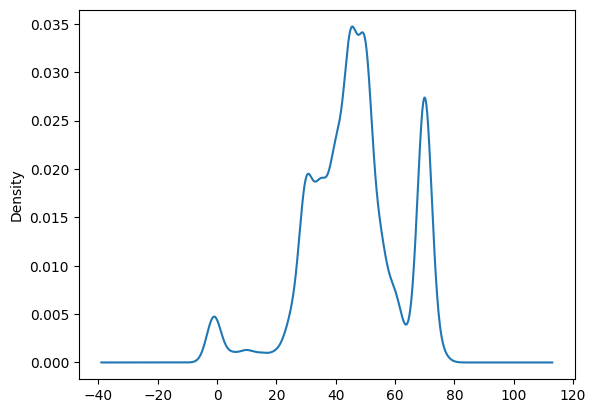

In [30]:
dfr['Speed Limit'].plot(kind="kde")

In [31]:
# Convert "Speed Limit" column to numeric, handling errors
dfr["Speed Limit"] = pd.to_numeric(dfr["Speed Limit"], errors="coerce")

# Verify -1 values
print("Value Counts:")
print(dfr["Speed Limit"].value_counts())

# Calculate the median speed
median_speed = dfr["Speed Limit"].median()
print("Median Speed:", median_speed)

# Replace -1 with the median value
dfr["Speed Limit"].replace(-1, median_speed, inplace=True)

# Verify the changes
print(dfr["Speed Limit"].value_counts())


Value Counts:
Speed Limit
 45    2281
 50    2259
 70    2132
 40    1419
 30    1331
 35    1181
 55     826
 60     481
-1      370
 25     291
 65     104
 10      87
 75      84
 20      68
 5       64
 15      63
Name: count, dtype: int64
Median Speed: 45.0
Speed Limit
45    2651
50    2259
70    2132
40    1419
30    1331
35    1181
55     826
60     481
25     291
65     104
10      87
75      84
20      68
5       64
15      63
Name: count, dtype: int64


In [32]:
# Convert "Speed Limit" column to numeric, handling errors
dfr2["Speed Limit"] = pd.to_numeric(dfr2["Speed Limit"], errors="coerce")

# Calculate the median speed
median_speed = dfr2["Speed Limit"].median()
print("Median Speed:", median_speed)

# Replace -1 with the median value
dfr2["Speed Limit"].replace(-1, median_speed, inplace=True)

# Verify the changes
print(dfr2["Speed Limit"].value_counts())


Median Speed: 45.0
Speed Limit
45    669
50    571
70    525
40    381
30    302
35    294
55    176
60    130
25     72
10     28
65     27
20     25
15     24
75     19
5      18
Name: count, dtype: int64


In [33]:
print(dfr["Person Ethnicity"].value_counts())
dfr.drop(columns=['Person Ethnicity'], inplace=True)
dfr2.drop(columns=['Person Ethnicity'], inplace=True)


Person Ethnicity
W - WHITE                          5533
H - HISPANIC                       2552
B - BLACK                          1821
A - ASIAN                           957
99 - UNKNOWN                        695
I - AMER. INDIAN/ALASKAN NATIVE     100
98 - OTHER                           64
No Data                              54
Name: count, dtype: int64


In [34]:
dfr["Day of Week"].isna().sum()
most_frequent_day = dfr["Day of Week"].mode()
dfr["Day of Week"].fillna(most_frequent_day)
dfr["Day of Week"].value_counts()
day_encode = pd.get_dummies(dfr["Day of Week"], prefix = "Day of week")
day_encode = day_encode.astype(int)
dfr[day_encode.columns] = day_encode
print(day_encode.head())

   Day of week_FRIDAY  Day of week_MONDAY  Day of week_SATURDAY  \
0                   1                   0                     0   
1                   0                   0                     1   
2                   0                   0                     1   
3                   0                   0                     0   
4                   0                   0                     0   

   Day of week_SUNDAY  Day of week_THURSDAY  Day of week_TUESDAY  \
0                   0                     0                    0   
1                   0                     0                    0   
2                   0                     0                    0   
3                   0                     0                    0   
4                   0                     0                    0   

   Day of week_WEDNESDAY  
0                      0  
1                      0  
2                      0  
3                      1  
4                      0  


In [35]:
day_encode = pd.get_dummies(dfr2["Day of Week"], prefix = "Day of week")
day_encode = day_encode.astype(int)
dfr2[day_encode.columns] = day_encode
print(day_encode.head())

   Day of week_FRIDAY  Day of week_MONDAY  Day of week_SATURDAY  \
0                   0                   0                     0   
1                   0                   0                     0   
2                   0                   0                     0   
3                   0                   0                     0   
4                   1                   0                     0   

   Day of week_SUNDAY  Day of week_THURSDAY  Day of week_TUESDAY  \
0                   0                     1                    0   
1                   0                     0                    0   
2                   0                     1                    0   
3                   0                     0                    0   
4                   0                     0                    0   

   Day of week_WEDNESDAY  
0                      0  
1                      0  
2                      0  
3                      1  
4                      0  


In [36]:
dfr.drop(columns=['Person Gender'], inplace=True)
dfr2.drop(columns=['Person Gender'], inplace=True)


In [37]:
dfr["Person Age"].value_counts()
dfr.drop(columns=['Person Age'], inplace=True)
dfr2.drop(columns=['Person Age'], inplace=True)

In [38]:
print(dfr["Manner of Collision"].nunique())
dfr2["Manner of Collision"].nunique()

36


34

In [39]:
dfr.drop(columns=['Manner of Collision'], inplace=True)
dfr2.drop(columns=['Manner of Collision'], inplace=True)


In [40]:
dfr["Surface Width"].value_counts()
dfr["Surface Width"] = pd.to_numeric(dfr["Speed Limit"], errors="coerce")
print(dfr["Surface Width"].value_counts())

Surface Width
45    2651
50    2259
70    2132
40    1419
30    1331
35    1181
55     826
60     481
25     291
65     104
10      87
75      84
20      68
5       64
15      63
Name: count, dtype: int64


In [41]:
dfr2["Surface Width"] = pd.to_numeric(dfr2["Speed Limit"], errors="coerce")

In [42]:
print(dfr["Vehicle Body Style"].value_counts())
print(dfr["Vehicle Body Style"].isna().sum())


Vehicle Body Style
P4 - PASSENGER CAR, 4-DOOR                     4336
SV - SPORT UTILITY VEHICLE                     3301
PK - PICKUP                                    1855
VN - VAN                                        466
P2 - PASSENGER CAR, 2-DOOR                      440
99 - UNKNOWN                                    330
TR - TRUCK                                      300
TT - TRUCK TRACTOR                              204
MC - MOTORCYCLE                                 100
SB - YELLOW SCHOOL BUS                           98
BU - BUS                                         98
No Data                                          91
98 - OTHER  (EXPLAIN IN NARRATIVE)               28
FT - FIRE TRUCK                                  24
PC - POLICE CAR/TRUCK                            23
AM - AMBULANCE                                   13
EV - NEV-NEIGHBORHOOD ELECTRIC VEHICLE            9
TL - TRAILER, SEMI-TRAILER, OR POLE TRAILER       3
Name: count, dtype: int64
1322


In [43]:
most_frequent_value = dfr["Vehicle Body Style"].mode()[0]  # Calculate the most frequent value
dfr["Vehicle Body Style"].fillna(most_frequent_value, inplace=True)  # Fill missing values with the most frequent value
dfr["Vehicle Body Style"].isna().sum()


0

In [44]:
# replacing no data and unknown values
dfr["Vehicle Body Style"].replace("98 - OTHER  (EXPLAIN IN NARRATIVE)", most_frequent_value, inplace = True)
dfr["Vehicle Body Style"].replace("No Data", most_frequent_value, inplace = True)


In [45]:
most_frequent_value = dfr["Vehicle Body Style"].mode()[0]
dfr["Vehicle Body Style"].replace("99 - UNKNOWN", most_frequent_value, inplace=True)


In [46]:
dfr["Vehicle Body Style"].value_counts()

Vehicle Body Style
P4 - PASSENGER CAR, 4-DOOR                     6107
SV - SPORT UTILITY VEHICLE                     3301
PK - PICKUP                                    1855
VN - VAN                                        466
P2 - PASSENGER CAR, 2-DOOR                      440
TR - TRUCK                                      300
TT - TRUCK TRACTOR                              204
MC - MOTORCYCLE                                 100
BU - BUS                                         98
SB - YELLOW SCHOOL BUS                           98
FT - FIRE TRUCK                                  24
PC - POLICE CAR/TRUCK                            23
AM - AMBULANCE                                   13
EV - NEV-NEIGHBORHOOD ELECTRIC VEHICLE            9
TL - TRAILER, SEMI-TRAILER, OR POLE TRAILER       3
Name: count, dtype: int64

In [47]:
vehicle_encode = pd.get_dummies(dfr["Vehicle Body Style"], prefix = "Vehicle")
vehicle_encode = vehicle_encode.astype(int)
dfr[vehicle_encode.columns] = vehicle_encode
print(vehicle_encode.head())

   Vehicle_AM - AMBULANCE  Vehicle_BU - BUS  \
0                       0                 1   
1                       0                 0   
2                       0                 0   
3                       0                 0   
4                       0                 0   

   Vehicle_EV - NEV-NEIGHBORHOOD ELECTRIC VEHICLE  Vehicle_FT - FIRE TRUCK  \
0                                               0                        0   
1                                               0                        0   
2                                               0                        0   
3                                               0                        0   
4                                               0                        0   

   Vehicle_MC - MOTORCYCLE  Vehicle_P2 - PASSENGER CAR, 2-DOOR  \
0                        0                                   0   
1                        0                                   0   
2                        0                        

In [48]:
most_frequent_value = dfr2["Vehicle Body Style"].mode()[0]  # Calculate the most frequent value
dfr2["Vehicle Body Style"].fillna(most_frequent_value, inplace=True)  # Fill missing values with the most frequent value
dfr2["Vehicle Body Style"].isna().sum()
dfr2["Vehicle Body Style"].replace("98 - OTHER  (EXPLAIN IN NARRATIVE)", most_frequent_value, inplace = True)
dfr2["Vehicle Body Style"].replace("No Data", most_frequent_value, inplace = True)
dfr2["Vehicle Body Style"].replace("99 - UNKNOWN", most_frequent_value, inplace=True)
vehicle_encode = pd.get_dummies(dfr2["Vehicle Body Style"], prefix = "Vehicle")
vehicle_encode = vehicle_encode.astype(int)
dfr2[vehicle_encode.columns] = vehicle_encode
print(vehicle_encode.head())

   Vehicle_AM - AMBULANCE  Vehicle_BU - BUS  \
0                       0                 0   
1                       0                 0   
2                       0                 0   
3                       0                 0   
4                       0                 0   

   Vehicle_EV - NEV-NEIGHBORHOOD ELECTRIC VEHICLE  Vehicle_FT - FIRE TRUCK  \
0                                               0                        0   
1                                               0                        0   
2                                               0                        0   
3                                               0                        0   
4                                               0                        0   

   Vehicle_MC - MOTORCYCLE  Vehicle_P2 - PASSENGER CAR, 2-DOOR  \
0                        1                                   0   
1                        0                                   0   
2                        0                        

In [49]:
print(dfr["Surface Condition"].value_counts())
print(dfr["Surface Condition"].isna().sum())
dfr["Surface Condition"].replace("99 - UNKNOWN", "1 - DRY", inplace=True)
dfr["Surface Condition"].replace("98 - OTHER (EXPLAIN IN NARRATIVE)", "1 - DRY", inplace=True)

print(dfr["Surface Condition"].value_counts())

Surface Condition
1 - DRY                              12122
2 - WET                                845
99 - UNKNOWN                            35
3 - STANDING WATER                      17
7 - SAND, MUD, DIRT                     11
98 - OTHER (EXPLAIN IN NARRATIVE)       11
Name: count, dtype: int64
0
Surface Condition
1 - DRY                12168
2 - WET                  845
3 - STANDING WATER        17
7 - SAND, MUD, DIRT       11
Name: count, dtype: int64


In [50]:
surface_encode = pd.get_dummies(dfr["Surface Condition"], prefix = "surface condition")
surface_encode = surface_encode.astype(int)
dfr[surface_encode.columns] = surface_encode
print(surface_encode.head())

   surface condition_1 - DRY  surface condition_2 - WET  \
0                          1                          0   
1                          1                          0   
2                          1                          0   
3                          1                          0   
4                          1                          0   

   surface condition_3 - STANDING WATER  surface condition_7 - SAND, MUD, DIRT  
0                                     0                                      0  
1                                     0                                      0  
2                                     0                                      0  
3                                     0                                      0  
4                                     0                                      0  


In [51]:
print(dfr2["Surface Condition"].value_counts())
print(dfr2["Surface Condition"].isna().sum())
dfr2["Surface Condition"].replace("99 - UNKNOWN", "1 - DRY", inplace=True)
dfr2["Surface Condition"].replace("98 - OTHER (EXPLAIN IN NARRATIVE)", "1 - DRY", inplace=True)

print(dfr2["Surface Condition"].value_counts())

surface_encode = pd.get_dummies(dfr2["Surface Condition"], prefix = "surface condition")
surface_encode = surface_encode.astype(int)
dfr2[surface_encode.columns] = surface_encode
print(surface_encode.head())

Surface Condition
1 - DRY                              3034
2 - WET                               212
99 - UNKNOWN                            7
3 - STANDING WATER                      5
98 - OTHER (EXPLAIN IN NARRATIVE)       2
7 - SAND, MUD, DIRT                     1
Name: count, dtype: int64
0
Surface Condition
1 - DRY                3043
2 - WET                 212
3 - STANDING WATER        5
7 - SAND, MUD, DIRT       1
Name: count, dtype: int64
   surface condition_1 - DRY  surface condition_2 - WET  \
0                          1                          0   
1                          1                          0   
2                          1                          0   
3                          1                          0   
4                          1                          0   

   surface condition_3 - STANDING WATER  surface condition_7 - SAND, MUD, DIRT  
0                                     0                                      0  
1                            

In [52]:
#dropping columns after converting into dummy columns
dfr.drop(columns = ['Surface Condition'], inplace= True)
dfr2.drop(columns = ['Surface Condition'], inplace= True)
dfr.drop(columns = ["Crash Severity"], inplace = True)
dfr2.drop(columns = ["Crash Severity"], inplace = True)
dfr.drop(columns = ["Vehicle Body Style"], inplace = True)
dfr2.drop(columns = ["Vehicle Body Style"], inplace = True)
dfr.drop(columns = ["Day of Week"], inplace = True)
dfr2.drop(columns = ["Day of Week"], inplace = True)

dfr.drop(columns = ["Weather Condition"], inplace = True)
dfr2.drop(columns = ["Weather Condition"], inplace = True)

In [53]:
dfr.drop(columns=['Person Drug Test Result'], inplace=True)
dfr2.drop(columns=['Person Drug Test Result'], inplace=True)

In [54]:
dfr['Crash Time'].isna().sum()

1320

In [55]:
dfr['Crash Time'].value_counts()

Crash Time
16:10:00    54
16:00:00    52
17:30:00    51
16:15:00    50
16:29:00    48
            ..
08:47:00     1
02:06:00     1
23:38:00     1
01:05:00     1
21:08:00     1
Name: count, Length: 1256, dtype: int64

In [56]:
frequent_time = dfr['Crash Time'].mode().iloc[0]
dfr['Crash Time'].fillna(frequent_time, inplace=True)

In [57]:
import pandas as pd

dfr['Crash Time'] = pd.to_datetime(dfr['Crash Time'], errors='coerce')

morning_start = pd.to_datetime('00:00:00').time()
morning_end = pd.to_datetime('11:59:59').time()
afternoon_start = pd.to_datetime('12:00:00').time()
afternoon_end = pd.to_datetime('16:59:59').time()
evening_start = pd.to_datetime('17:00:00').time()
evening_end = pd.to_datetime('20:59:59').time()
night_start = pd.to_datetime('21:00:00').time()
night_end = pd.to_datetime('23:59:59').time()

def categorize_time(time):
    if pd.isna(time):
        return 0  # Handle missing values, you can use 0 or any other value
    if morning_start <= time.time() <= morning_end:
        return 1  # Morning
    elif afternoon_start <= time.time() <= afternoon_end:
        return 2  # Afternoon
    elif evening_start <= time.time() <= evening_end:
        return 3  # Evening
    else:
        return 4  # Night

# Create a new column 'Time Category' to store the integer categories
dfr['Time Category'] = dfr['Crash Time'].apply(categorize_time)

# Convert the 'Time Category' column to int data type
dfr['Time Category'] = dfr['Time Category'].astype(int)

# Display the DataFrame with the new 'Time Category' column
print(dfr['Time Category'].value_counts())


Time Category
2    5643
1    3436
3    2903
4    1059
Name: count, dtype: int64


In [58]:
frequent_time = dfr2['Crash Time'].mode().iloc[0]
dfr2['Crash Time'].fillna(frequent_time, inplace=True)
import pandas as pd

dfr2['Crash Time'] = pd.to_datetime(dfr2['Crash Time'], errors='coerce')

morning_start = pd.to_datetime('00:00:00').time()
morning_end = pd.to_datetime('11:59:59').time()
afternoon_start = pd.to_datetime('12:00:00').time()
afternoon_end = pd.to_datetime('16:59:59').time()
evening_start = pd.to_datetime('17:00:00').time()
evening_end = pd.to_datetime('20:59:59').time()
night_start = pd.to_datetime('21:00:00').time()
night_end = pd.to_datetime('23:59:59').time()

def categorize_time(time):
    if pd.isna(time):
        return 0  # Handle missing values, you can use 0 or any other value
    if morning_start <= time.time() <= morning_end:
        return 1  # Morning
    elif afternoon_start <= time.time() <= afternoon_end:
        return 2  # Afternoon
    elif evening_start <= time.time() <= evening_end:
        return 3  # Evening
    else:
        return 4  # Night

# Create a new column 'Time Category' to store the integer categories
dfr2['Time Category'] = dfr2['Crash Time'].apply(categorize_time)

# Convert the 'Time Category' column to int data type
dfr2['Time Category'] = dfr2['Time Category'].astype(int)

# Display the DataFrame with the new 'Time Category' column
print(dfr2['Time Category'].value_counts())


Time Category
2    1301
1     941
3     760
4     259
Name: count, dtype: int64


In [59]:
dfr.drop(columns=['Crash Time'], inplace=True)
dfr2.drop(columns=['Crash Time'], inplace=True)

In [60]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13041 entries, 0 to 13040
Data columns (total 40 columns):
 #   Column                                               Non-Null Count  Dtype
---  ------                                               --------------  -----
 0   Crash ID                                             13041 non-null  int64
 1   Speed Limit                                          13041 non-null  int64
 2   Surface Width                                        13041 non-null  int64
 3   y                                                    13041 non-null  int64
 4   Crash_A - SUSPECTED SERIOUS INJURY                   13041 non-null  int32
 5   Crash_B - SUSPECTED MINOR INJURY                     13041 non-null  int32
 6   Crash_C - POSSIBLE INJURY                            13041 non-null  int32
 7   Crash_K - FATAL INJURY                               13041 non-null  int32
 8   Crash_N - NOT INJURED                                13041 non-null  int32
 9   Weathe

In [61]:
# checking duplicates
dfr.drop_duplicates(inplace=True)
dfr2.drop_duplicates(inplace=True)

print("Train duplicated rows:",dfr.duplicated().sum())
print("Test duplicated rows:", dfr2.duplicated().sum())

Train duplicated rows: 0
Test duplicated rows: 0


In [62]:
# function for removing outliers (data points, which are completely apart from other data points)
def outliers_removal(dfr, col):
    Q1 = dfr[col].quantile(0.25)
    Q3 = dfr[col].quantile(0.75)
    IQR = Q3 - Q1
    return dfr[(dfr[col] >= Q1 - 1.5*IQR) & (dfr[col] <= Q3 + 1.5*IQR)]


In [63]:
# removing outliers for each column in regression training
for x in dfr.columns:
    new_reg_train_data = outliers_removal(dfr, x)

In [64]:
# removing outliers for each column of test data
for x in dfr2.columns:
    new_reg_test_data = outliers_removal(dfr2, x)

In [65]:
dfr.columns

Index(['Crash ID', 'Speed Limit', 'Surface Width', 'y',
       'Crash_A - SUSPECTED SERIOUS INJURY',
       'Crash_B - SUSPECTED MINOR INJURY', 'Crash_C - POSSIBLE INJURY',
       'Crash_K - FATAL INJURY', 'Crash_N - NOT INJURED', 'Weather_1 - CLEAR',
       'Weather_2 - CLOUDY', 'Weather_3 - RAIN', 'Weather_6 - FOG',
       'Day of week_FRIDAY', 'Day of week_MONDAY', 'Day of week_SATURDAY',
       'Day of week_SUNDAY', 'Day of week_THURSDAY', 'Day of week_TUESDAY',
       'Day of week_WEDNESDAY', 'Vehicle_AM - AMBULANCE', 'Vehicle_BU - BUS',
       'Vehicle_EV - NEV-NEIGHBORHOOD ELECTRIC VEHICLE',
       'Vehicle_FT - FIRE TRUCK', 'Vehicle_MC - MOTORCYCLE',
       'Vehicle_P2 - PASSENGER CAR, 2-DOOR',
       'Vehicle_P4 - PASSENGER CAR, 4-DOOR', 'Vehicle_PC - POLICE CAR/TRUCK',
       'Vehicle_PK - PICKUP', 'Vehicle_SB - YELLOW SCHOOL BUS',
       'Vehicle_SV - SPORT UTILITY VEHICLE',
       'Vehicle_TL - TRAILER, SEMI-TRAILER, OR POLE TRAILER',
       'Vehicle_TR - TRUCK', 'Vehicle_T

In [66]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9685 entries, 0 to 13039
Data columns (total 40 columns):
 #   Column                                               Non-Null Count  Dtype
---  ------                                               --------------  -----
 0   Crash ID                                             9685 non-null   int64
 1   Speed Limit                                          9685 non-null   int64
 2   Surface Width                                        9685 non-null   int64
 3   y                                                    9685 non-null   int64
 4   Crash_A - SUSPECTED SERIOUS INJURY                   9685 non-null   int32
 5   Crash_B - SUSPECTED MINOR INJURY                     9685 non-null   int32
 6   Crash_C - POSSIBLE INJURY                            9685 non-null   int32
 7   Crash_K - FATAL INJURY                               9685 non-null   int32
 8   Crash_N - NOT INJURED                                9685 non-null   int32
 9   Weather_1 - 

In [67]:
dfr2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 0 to 3260
Data columns (total 39 columns):
 #   Column                                               Non-Null Count  Dtype
---  ------                                               --------------  -----
 0   Crash ID                                             2927 non-null   int64
 1   Speed Limit                                          2927 non-null   int64
 2   Surface Width                                        2927 non-null   int64
 3   Crash_A - SUSPECTED SERIOUS INJURY                   2927 non-null   int32
 4   Crash_B - SUSPECTED MINOR INJURY                     2927 non-null   int32
 5   Crash_C - POSSIBLE INJURY                            2927 non-null   int32
 6   Crash_K - FATAL INJURY                               2927 non-null   int32
 7   Crash_N - NOT INJURED                                2927 non-null   int32
 8   Weather_1 - CLEAR                                    2927 non-null   int32
 9   Weather_2 - C

In [68]:
#Clustering for regression_train (dfr) dataset

In [69]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sb
X_dfr = dfr.drop('y', axis = 1)
Y = dfr['y']
print("X shape:", X_dfr.shape)
print("Y shape:", Y.shape)

scaler = StandardScaler()
scaler.fit(X_dfr)
X_scaled_dfr = scaler.transform(X_dfr)
X_scaled_dfr = pd.DataFrame(X_scaled_dfr, columns = X_dfr.columns)

scaler = MinMaxScaler()
X_scaled_min_max = scaler.fit_transform(X_dfr)
X_scaled_min_max = pd.DataFrame(X_scaled_min_max, columns= X_dfr.columns)


X shape: (9685, 39)
Y shape: (9685,)


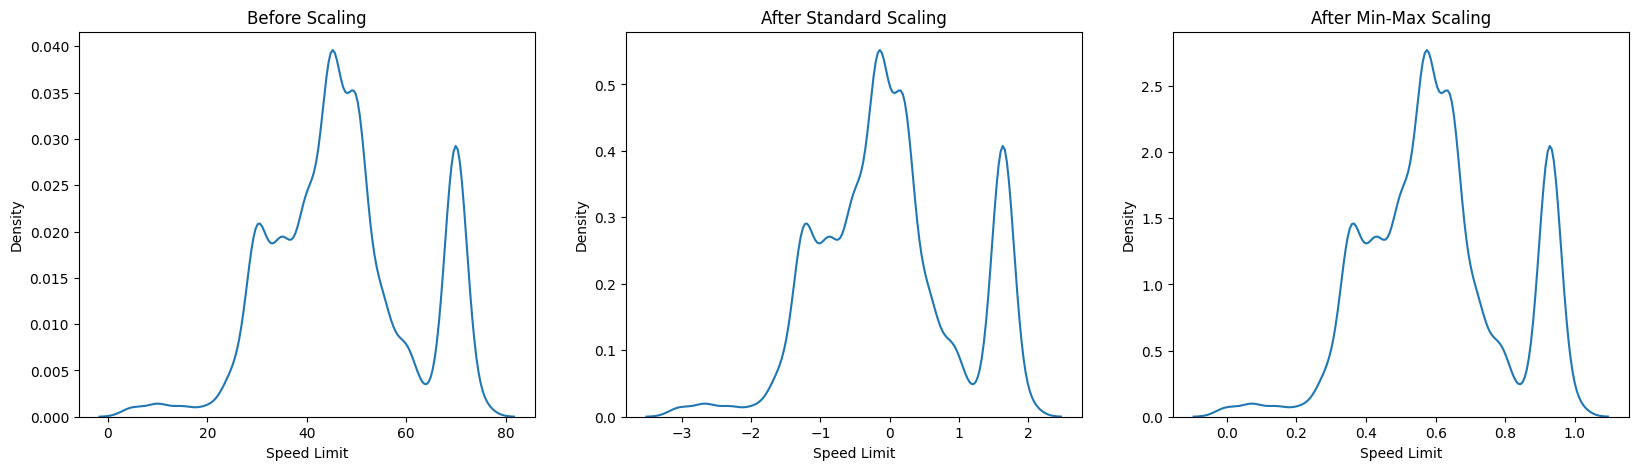

In [70]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))
ax1.set_title('Before Scaling')
sb.kdeplot(X_dfr['Speed Limit'], ax=ax1)

ax2.set_title('After Standard Scaling')
ax2.set_xlabel("Speed Limit")
sb.kdeplot(X_scaled_dfr['Speed Limit'], ax=ax2)

ax3.set_title('After Min-Max Scaling')
ax3.set_xlabel("Speed Limit")
sb.kdeplot(X_scaled_min_max['Speed Limit'], ax=ax3)

plt.show()


In [71]:
#scaling for regression test dataset
X_dfr2 = dfr2
scaler = StandardScaler()
scaler.fit(X_dfr2)
X_scaled_dfr2 = scaler.transform(X_dfr2)
X_scaled_dfr2 = pd.DataFrame(X_scaled_dfr2, columns = X_dfr2.columns)

scaler = MinMaxScaler()
X_scaled_min_max_dfr2 = scaler.fit_transform(X_dfr2)
X_scaled_min_max_dfr2 = pd.DataFrame(X_scaled_min_max_dfr2, columns= X_dfr2.columns)


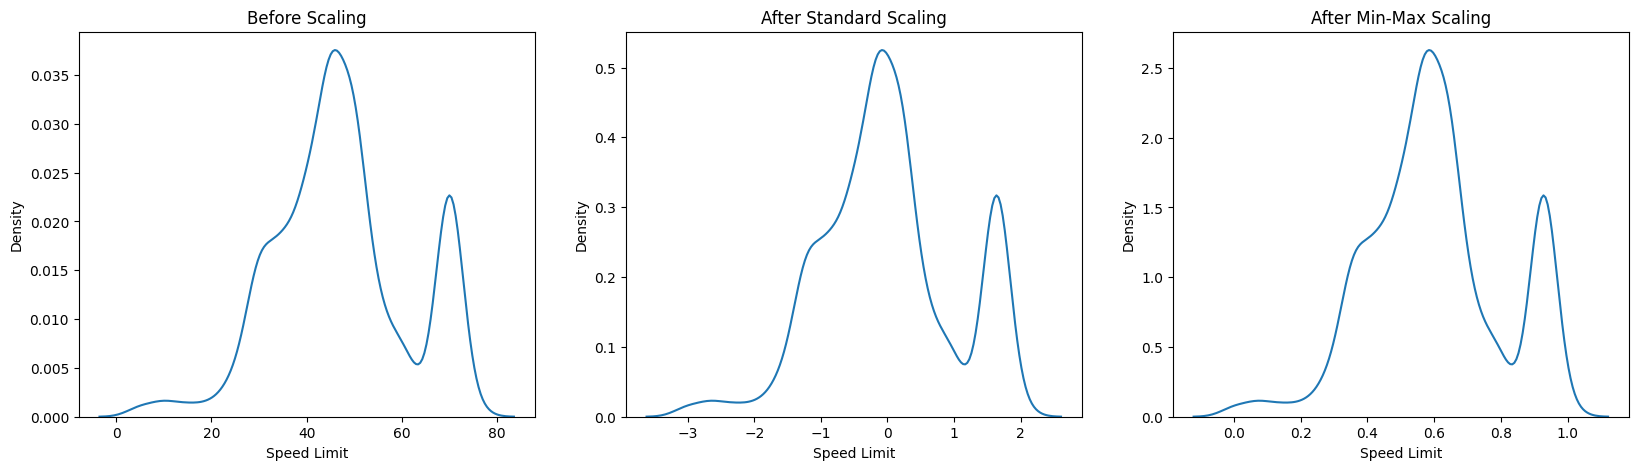

In [72]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))
ax1.set_title('Before Scaling')
sb.kdeplot(X_dfr2['Speed Limit'], ax=ax1)

ax2.set_title('After Standard Scaling')
ax2.set_xlabel("Speed Limit")
sb.kdeplot(X_scaled_dfr2['Speed Limit'], ax=ax2)

ax3.set_title('After Min-Max Scaling')
ax3.set_xlabel("Speed Limit")
sb.kdeplot(X_scaled_min_max_dfr2['Speed Limit'], ax=ax3)

plt.show()


In [73]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
model = AgglomerativeClustering(distance_threshold = 10, n_clusters = None, 
                                linkage = 'ward')

# Train the model
model = model.fit(X_scaled_min_max)
print(model.n_clusters_)
silhouette_score(X_scaled_min_max, model.labels_)

58


0.3383208708564201

In [74]:
model = AgglomerativeClustering(distance_threshold = 10, n_clusters = None, 
                                linkage = 'ward')

# Train the model
model = model.fit(X_scaled_dfr)
print(model.n_clusters_)
silhouette_score(X_scaled_dfr, model.labels_)

400


0.2856258108877433

In [75]:
#As the silhouette score is significantly higher for Standard Scaling 0.212 
#in comparison with the Min Max Scaling 0.051, 
#it can be understood that clusters are better defined using a Standard Scaler

In [76]:
model = AgglomerativeClustering(distance_threshold = 145, n_clusters = None, 
                                linkage = 'ward')

# Train the model
model = model.fit(X_scaled_dfr)
print(model.n_clusters_)
silhouette_score(X_scaled_dfr, model.labels_)

4


0.12097040784200468

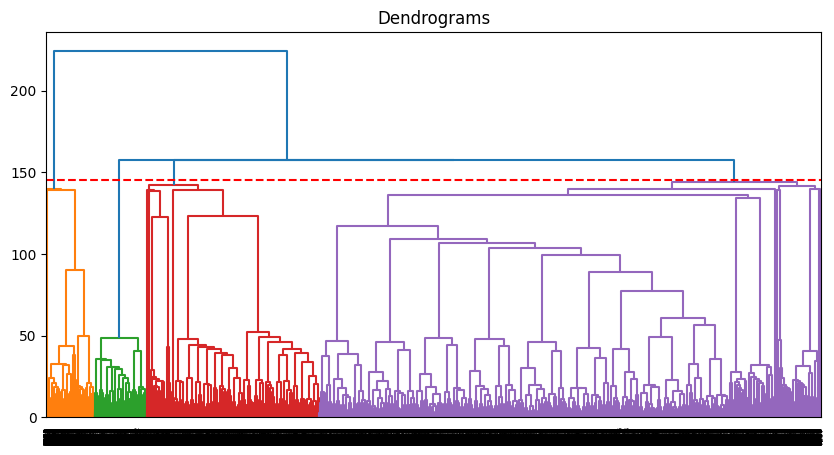

In [77]:
# Plotting the dendogram to get the distance threshold for our clustering model
from scipy.cluster.hierarchy import dendrogram, linkage

plt.subplots(figsize = (10,5))
plt.title("Dendrograms")
dendrogram(linkage(X_scaled_dfr, method = 'ward'))
plt.axhline(y = 145, c = 'r', linestyle = '--')

plt.show()

In [78]:
# Performing the clustering with our n clusters and ward linkage
model = AgglomerativeClustering(n_clusters = 4, affinity='euclidean', linkage='ward')

# Train the model
model = model.fit(X_scaled_dfr)
model.labels_

array([1, 0, 2, ..., 1, 0, 0], dtype=int64)

In [79]:
# getting silhouette score
agglo_sil = silhouette_score(X_scaled_dfr, model.labels_)
agglo_sil

0.12097040784200468

Text(0.5, 1.0, 'Clusters vs SSE')

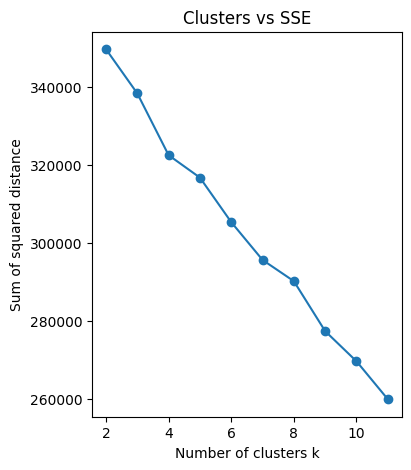

In [80]:
#K Means Clustering
# processing our model with the help of elbow method, to find the best value for K. by training our model by k means clustering.
from sklearn.cluster import KMeans
sse = []
list_k = list(range(2, 12))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled_dfr)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(4, 5))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters k')
plt.ylabel('Sum of squared distance')
plt.title('Clusters vs SSE')

In [81]:
#Based on Elbow method, we can see that the curve elbows at value 3. Hence number of clusters we choose are 3

In [82]:
# TRAINING THE DATA FOR K = 3

kmeans = KMeans(3, init = 'k-means++', random_state = 0, max_iter=24)
kmeans.fit(X_scaled_dfr)

KMeans(max_iter=24, n_clusters=3, random_state=0)

In [83]:
predict = kmeans.predict(X_scaled_dfr) # predicting the values for K means
predict

array([1, 1, 0, ..., 0, 1, 1])

In [84]:
# getting the cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[ 4.05200617e-02, -2.46703528e-02, -2.46703528e-02,
         3.67029482e-01,  9.27778878e-01,  8.94255584e-01,
         1.42540682e-01, -1.50840280e+00,  1.33221981e-01,
        -1.84249013e-02, -2.03189279e-01, -1.03100549e-02,
         1.54376223e-02,  6.51140891e-03, -6.16543416e-03,
        -3.37807128e-02,  2.31946852e-02, -9.79055366e-03,
        -6.90148042e-03, -2.68940502e-02,  7.41371488e-03,
         4.11895727e-02, -3.66617788e-02,  1.89398846e-01,
        -1.51336774e-02, -4.03294394e-02, -1.72170940e-02,
        -1.40013231e-02, -3.61325866e-02,  4.90509772e-02,
         3.02429098e-03, -2.32879851e-02, -6.14949819e-02,
         1.98723649e-02,  2.71078109e-01, -2.69104496e-01,
        -3.80476928e-02, -3.48316698e-03,  1.26937902e-02],
       [ 9.87182677e-03, -5.21659923e-02, -5.21659923e-02,
        -1.56314113e-01, -4.09182217e-01, -3.94798499e-01,
        -5.66666057e-02,  6.62952894e-01,  1.43313464e-01,
        -3.11902925e-02, -2.01550683e-01, -1.20475201e-

In [85]:
kmeans.labels_ # labels of clusters

array([1, 1, 0, ..., 0, 1, 1])

In [86]:
# getting silhouette score for k means

k_means_sil = silhouette_score(X_scaled_dfr, predict)
k_means_sil, agglo_sil

(0.12356156293862093, 0.12097040784200468)

### Regression model training

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings

# Ignore the "deprecated" warning category
warnings.filterwarnings("ignore")


In [89]:
Y.shape

(9685,)

In [90]:
X_scaled_dfr.shape

(9685, 39)

In [91]:
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_dfr, Y, test_size = 0.25, random_state = 0 )

In [94]:
x = X_train
y = y_train
x = sm.add_constant(x)
print(x.index)
print(y.index)
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)
results = sm.OLS(y,x).fit()
results.summary()

Index([2585, 6418, 2159, 7897, 5850, 1045, 7965, 2503, 3073, 6849,
       ...
        705, 3468, 6744, 5874, 4373, 7891, 9225, 4859, 3264, 2732],
      dtype='int64', length=7263)
Index([ 2805,  7803,  2318, 10039,  6987,  1093, 10147,  2710,  3374,  8435,
       ...
         726,  3836,  8284,  7024,  4993, 10023, 12216,  5625,  3592,  2975],
      dtype='int64', length=7263)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     4.806
Date:                Sat, 03 Feb 2024   Prob (F-statistic):           1.39e-18
Time:                        18:58:06   Log-Likelihood:                -43493.
No. Observations:                7263   AIC:                         8.706e+04
Df Residuals:                    7228   BIC:                         8.730e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  64.7395      1.136     57.002      0.000      62.513      66.966
Crash ID                                                0.3415      1.147      0.298      0.766      -1.907       2.590
Speed Limit                                            -3.0439      0.585     -5.206      0.000      -4.190      -1.898
Surface Width                                          -3.0439      0.585     -5.206      0.000      -4.190      -1.898
Crash_A - SUSPECTED SERIOUS INJURY                      3.7842      1.097      3.451      0.001       1.634       5.934
Crash_B - SUSPECTED MINOR INJURY                       -1.0427      0.859     -1.214      0.225      -2.726       0.641
Crash_C - POSSIBLE INJURY                              -2.1784      0.873     -2.495      0.013      -3.890      -0.467
Crash_K - FATAL INJURY                                  8.3751      1.060      7.904      0.000       6.298      10.452
Crash_N - NOT INJURED                                   0.1282      0.636      0.201      0.840      -1.119       1.375
Weather_1 - CLEAR                                      -0.0669      0.757     -0.088      0.930      -1.551       1.417
Weather_2 - CLOUDY                                      0.0140      0.788      0.018      0.986      -1.531       1.559
Weather_3 - RAIN                                        0.0830      1.422      0.058      0.953      -2.705       2.871
Weather_6 - FOG                                         0.0993      0.984      0.101      0.920      -1.829       2.027
Day of week_FRIDAY                                      1.5227      1.519      1.002      0.316      -1.456       4.501
Day of week_MONDAY                                      2.3500      1.492      1.575      0.115      -0.576       5.276
Day of week_SATURDAY                                    2.3597      1.458      1.618      0.106      -0.499       5.218
Day of week_SUNDAY                                      3.9009      1.449      2.692      0.007       1.060       6.742
Day of week_THURSDAY                                    0.7567      1.496      0.506      0.613      -2.177       3.690
Day of week_TUESDAY                                    -0.3491      1.495     -0.234      0.815      -3.279       2.581
Day of week_WEDNESDAY                                  -0.5311      1.503     -0.353      0.724      -3.478       2.415
Vehicle_AM - AMBULANCE                                 -0.9224      0.984     -0.937      0.349      -2.852       1.007
Vehicle_BU - BUS                                        3.1408      1.075      2.923      0.003       1.034       5.247
Vehicle_EV - NEV-NEIGHBORHOOD ELECTRIC VEHICLE         -0.5872      1.554     -0.37

In [95]:
y_predict = results.predict(x)
error = y - y_predict
lin = pd.DataFrame(y_predict, columns= ['y_predict'])
lin['error'] = error

Text(0, 0.5, 'Residuals')

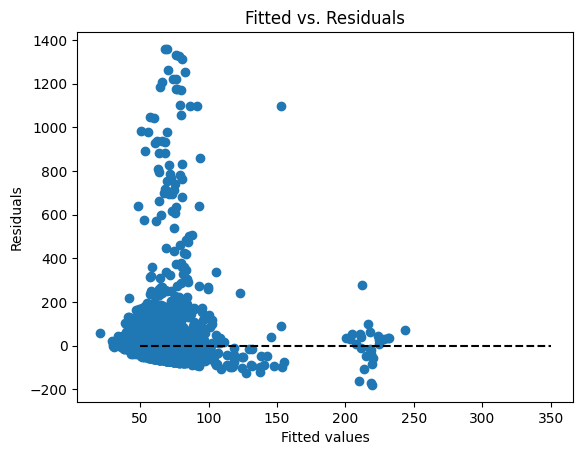

In [96]:
plt.scatter(lin['y_predict'], lin['error'])
plt.hlines(0, xmin = 50, xmax = 350, linestyles= '--', color = 'k')
plt.title('Fitted vs. Residuals')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [97]:
import scipy.stats

results = {}

max_correlation = -1  
best_column = None

for column in X_train.columns[1:]:
    correl, p_value = scipy.stats.pearsonr(X_train[column], y_train)
    results[column] = correl
    print(column, correl)

# Check if this column has a higher correlation coefficient than the current maximum
    if correl > max_correlation:
        max_correlation = correl
        best_column = column

# Print the highest correlation value and the corresponding column
print(f"The column with the highest Pearson correlation coefficient is '{best_column}' with a coefficient of {max_correlation}.")


Speed Limit -0.06107690526458366
Surface Width -0.06107690526458366
Crash_A - SUSPECTED SERIOUS INJURY 0.04159028391899689
Crash_B - SUSPECTED MINOR INJURY -0.013559035128056108
Crash_C - POSSIBLE INJURY -0.028613055375579444
Crash_K - FATAL INJURY 0.09562558549370954
Crash_N - NOT INJURED 0.0050930439601774005
Weather_1 - CLEAR 0.011017686143246453
Weather_2 - CLOUDY -0.0032866043547236036
Weather_3 - RAIN -0.014661221757360624
Weather_6 - FOG 0.0006305039389414669
Day of week_FRIDAY 0.002120628237692637
Day of week_MONDAY 0.013209537751039913
Day of week_SATURDAY 0.014029606097098926
Day of week_SUNDAY 0.034835148277651114
Day of week_THURSDAY -0.006940804738457391
Day of week_TUESDAY -0.018892367171341764
Day of week_WEDNESDAY -0.01902875255198809
Vehicle_AM - AMBULANCE -0.008869589236939831
Vehicle_BU - BUS 0.03407243558598077
Vehicle_EV - NEV-NEIGHBORHOOD ELECTRIC VEHICLE -0.003973869702684604
Vehicle_FT - FIRE TRUCK -0.008980577130159942
Vehicle_MC - MOTORCYCLE 0.0234685237816635

In [98]:
x = X_train['Crash_K - FATAL INJURY']
y = y_train
x = sm.add_constant(x)


In [99]:
print(x.index)
print(y.index)
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)


Index([2585, 6418, 2159, 7897, 5850, 1045, 7965, 2503, 3073, 6849,
       ...
        705, 3468, 6744, 5874, 4373, 7891, 9225, 4859, 3264, 2732],
      dtype='int64', length=7263)
Index([ 2805,  7803,  2318, 10039,  6987,  1093, 10147,  2710,  3374,  8435,
       ...
         726,  3836,  8284,  7024,  4993, 10023, 12216,  5625,  3592,  2975],
      dtype='int64', length=7263)


In [100]:
print(x.dtypes)
print(y.dtypes)


const                     float64
Crash_K - FATAL INJURY    float64
dtype: object
int64


In [101]:
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     67.01
Date:                Sat, 03 Feb 2024   Prob (F-statistic):           3.17e-16
Time:                        18:58:06   Log-Likelihood:                -43541.
No. Observations:                7263   AIC:                         8.709e+04
Df Residuals:                    7261   BIC:                         8.710e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     64.7815      1.140     56.838      0.000      62.547      67.016
Crash_K - FATAL INJURY     8.6593      1.058      8.186      0.000       6.586      10.733
==============================================================================
Omnibus:                    10504.009   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2793799.040
Skew:                           8.854   Prob(JB):                         0.00
Kurtosis:                      97.437   Cond. No.                         1.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
coefficients = results.params
print(coefficients)

const                     64.781461
Crash_K - FATAL INJURY     8.659288
dtype: float64


In [103]:
y_predict = results.predict(x)
error = y - y_predict
lin = pd.DataFrame(y_predict, columns= ['y_predict'])
lin['error'] = error

Text(0, 0.5, 'Residuals')

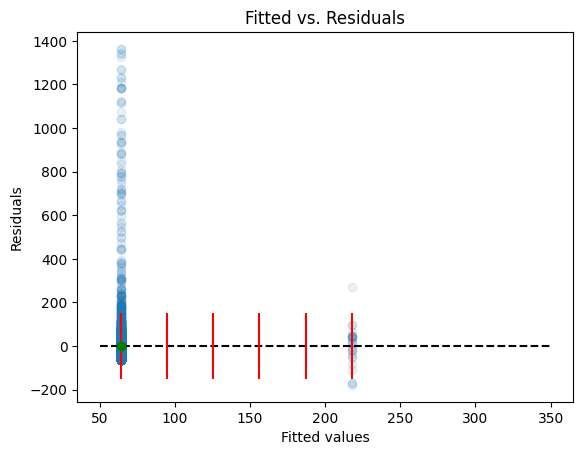

In [104]:
#to check for linearity
plt.scatter(lin['y_predict'], lin['error'], alpha = 0.1)
plt.hlines(0, xmin = 50, xmax = 350, linestyles= '--', color = 'k')

# divit the plot into 5 equal bands
vals = np.linspace(lin['y_predict'].min(), lin['y_predict'].max(), 6)
for i in range(6):
    plt.vlines(vals[i], ymin = -150, ymax = 150, color = 'red')

# Find the mean of each band
band_mean = []
for i in range(5):
    lin_band = lin[(lin['y_predict'] >= vals[i]) & (lin['y_predict'] < vals[i+1])]
    band_mean.append([lin_band['y_predict'].mean(), lin_band['error'].mean()])

plt.plot(np.array(band_mean)[:,0], np.array(band_mean)[:,1], 'o-', color = 'g')

plt.title('Fitted vs. Residuals')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

<Axes: ylabel='Count'>

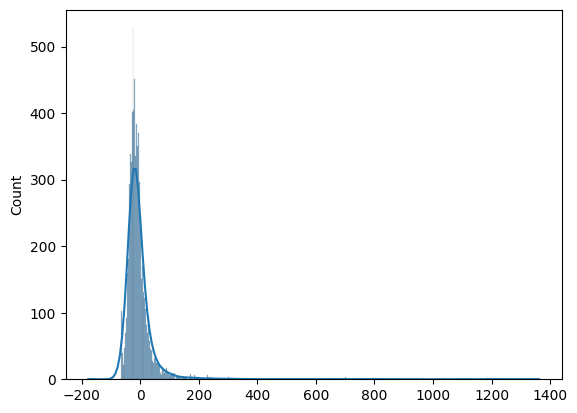

In [105]:
import seaborn as sns

sb.histplot(error, kde= True)

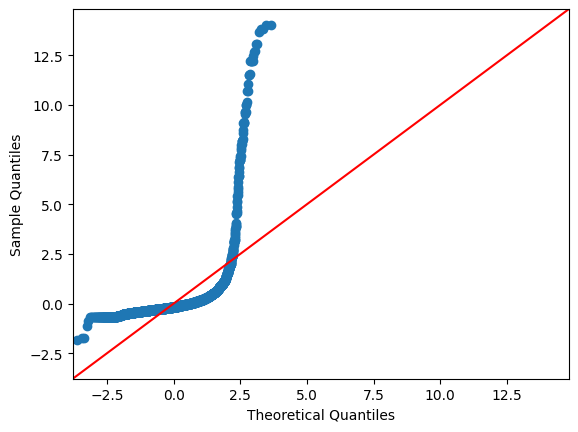

In [106]:
import statsmodels.api as sm

sm.qqplot(error, line = '45', fit = True)
plt.show()

In [107]:
import scipy.stats as st
x = X_scaled_dfr["Crash_K - FATAL INJURY"].values
y = Y.values
model = st.linregress(x,y)
model
y_predict = model.slope * x + model.intercept
y_mean = y.mean()

sst = ((y - y_mean)**2).sum()
ssr = ((y - y_predict)**2).sum()

# accuracy score for statistical learning simple linear regression 
stat_sl_score = 1 - (ssr/sst)
stat_sl_score

0.008039554508016855

In [108]:
corr_matrix = X_train.corr()
corr_matrix

,Crash ID,Speed Limit,Surface Width,Crash_A - SUSPECTED SERIOUS INJURY,Crash_B - SUSPECTED MINOR INJURY,Crash_C - POSSIBLE INJURY,Crash_K - FATAL INJURY,Crash_N - NOT INJURED,Weather_1 - CLEAR,Weather_2 - CLOUDY,...,Vehicle_SV - SPORT UTILITY VEHICLE,"Vehicle_TL - TRAILER, SEMI-TRAILER, OR POLE TRAILER",Vehicle_TR - TRUCK,Vehicle_TT - TRUCK TRACTOR,Vehicle_VN - VAN,surface condition_1 - DRY,surface condition_2 - WET,surface condition_3 - STANDING WATER,"surface condition_7 - SAND, MUD, DIRT",Time Category
Crash ID,1.000000,0.007992,0.007992,0.006716,0.002346,0.018454,-0.011773,-0.016190,0.150579,-0.139063,...,-0.002280,0.007683,0.028358,-0.017683,-0.000468,0.072314,-0.073040,-0.018871,0.017893,0.000749
Speed Limit,0.007992,1.000000,1.000000,0.010841,-0.000433,0.012954,0.008262,-0.014004,-0.101851,0.007693,...,0.001773,0.021289,0.038152,0.068396,-0.017298,-0.166346,0.169170,0.006707,-0.011310,-0.043360
Surface Width,0.007992,1.000000,1.000000,0.010841,-0.000433,0.012954,0.008262,-0.014004,-0.101851,0.007693,...,0.001773,0.021289,0.038152,0.068396,-0.017298,-0.166346,0.169170,0.006707,-0.011310,-0.043360
Crash_A - SUSPECTED SERIOUS INJURY,0.006716,0.010841,0.010841,1.000000,-0.065305,-0.063078,-0.009682,-0.236438,0.016991,-0.008008,...,-0.021527,0.051038,-0.009354,0.023355,-0.007407,0.008709,-0.014598,-0.005263,0.052471,0.046843
Crash_B - SUSPECTED MINOR INJURY,0.002346,-0.000433,-0.000433,-0.065305,1.000000,-0.163965,-0.025168,-0.614593,0.009106,-0.023367,...,0.002858,-0.006838,0.005575,-0.037580,0.004371,-0.003043,0.003360,0.009888,-0.012797,0.028132
Crash_C - POSSIBLE INJURY,0.018454,0.012954,0.012954,-0.063078,-0.163965,1.000000,-0.024309,-0.593634,-0.021516,0.023837,...,0.028010,-0.006605,-0.017816,-0.029263,0.026274,-0.001996,0.003695,-0.013215,0.000555,-0.024623
Crash_K - FATAL INJURY,-0.011773,0.008262,0.008262,-0.009682,-0.025168,-0.024309,1.000000,-0.091119,0.010419,-0.004047,...,-0.003056,-0.001014,-0.010039,0.041005,-0.011957,0.016787,-0.016520,-0.002028,-0.001897,0.001064
Crash_N - NOT INJURED,-0.016190,-0.014004,-0.014004,-0.236438,-0.614593,-0.593634,-0.091119,1.000000,0.001996,0.003299,...,-0.015383,-0.006815,0.013436,0.037151,-0.018795,-0.001320,0.001751,0.004312,-0.007958,-0.018933
Weather_1 - CLEAR,0.150579,-0.101851,-0.101851,0.016991,0.009106,-0.021516,0.010419,0.001996,1.000000,-0.823679,...,0.001158,0.006465,0.008056,-0.019861,-0.010122,0.498330,-0.503610,-0.023880,0.012100,0.053063
Weather_2 - CLOUDY,-0.139063,0.007693,0.007693,-0.008008,-0.023367,0.023837,-0.004047,0.003299,-0.823679,1.000000,...,0.003054,-0.005325,-0.011327,0.000084,0.017529,-0.108153,0.110410,0.003613,-0.009966,-0.052336


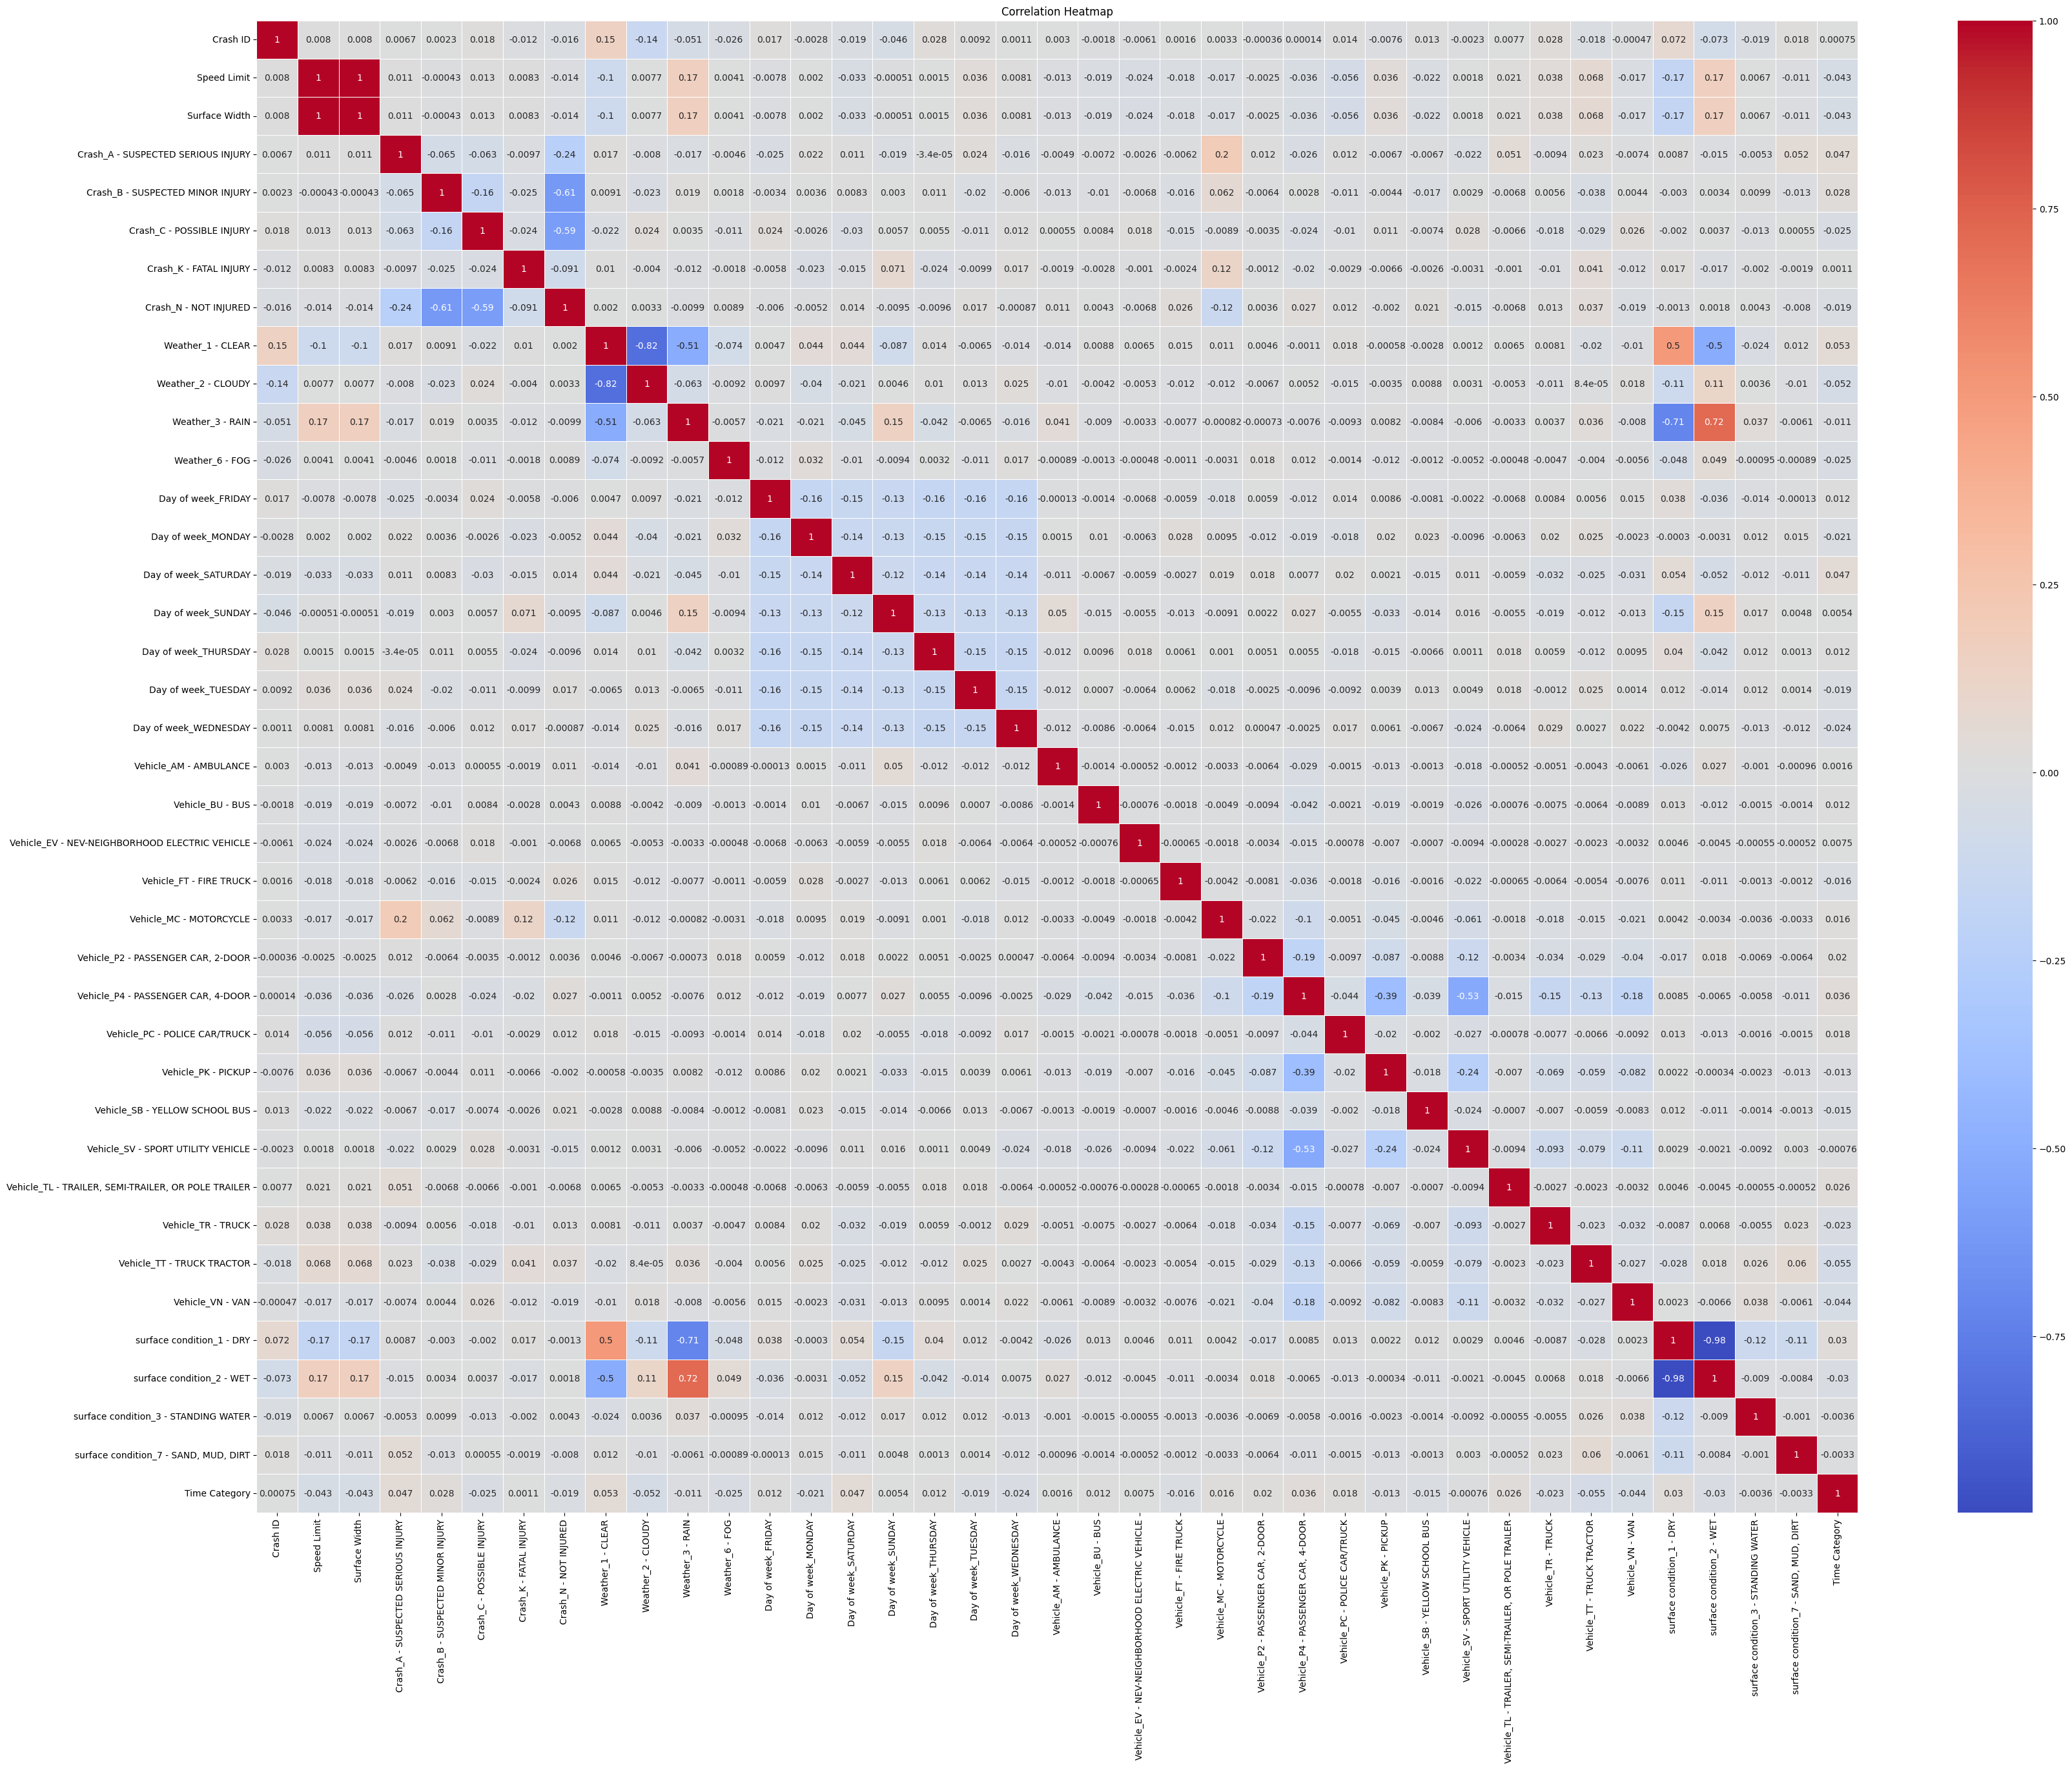

In [109]:
correlation_matrix = X_train.corr()
plt.figure(figsize=(40, 30))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [110]:
import numpy as np

# Calculate the correlation matrix using np.corrcoef
corr_matrix = X_train.corr()

# Create a dictionary to store related columns
related_columns_dict = {}

# Find columns with correlation >= 0.75
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) >= 0.75:
            col_i = corr_matrix.columns[i]
            col_j = corr_matrix.columns[j]
            # Retain the one that appears first in the dictionary order
            if col_i < col_j:
                first_col, second_col = col_i, col_j
            else:
                first_col, second_col = col_j, col_i

            if first_col in related_columns_dict:
                related_columns_dict[first_col].append(second_col)
            else:
                related_columns_dict[first_col] = [second_col]

print(related_columns_dict)


{'Speed Limit': ['Surface Width'], 'Weather_1 - CLEAR': ['Weather_2 - CLOUDY'], 'surface condition_1 - DRY': ['surface condition_2 - WET']}


In [111]:
columns = ['Speed Limit','Surface Width', 'Weather_1 - CLEAR','Weather_2 - CLOUDY', 'surface condition_1 - DRY','surface condition_2 - WET']
X_train.drop(columns, axis = 1, inplace = True)


In [112]:
columns = ['Speed Limit','Surface Width', 'Weather_1 - CLEAR','Weather_2 - CLOUDY', 'surface condition_1 - DRY','surface condition_2 - WET']
X_test.drop(columns, axis = 1, inplace = True)


In [113]:
X_train_MLR = X_train
X_train_MLR.columns

Index(['Crash ID', 'Crash_A - SUSPECTED SERIOUS INJURY',
       'Crash_B - SUSPECTED MINOR INJURY', 'Crash_C - POSSIBLE INJURY',
       'Crash_K - FATAL INJURY', 'Crash_N - NOT INJURED', 'Weather_3 - RAIN',
       'Weather_6 - FOG', 'Day of week_FRIDAY', 'Day of week_MONDAY',
       'Day of week_SATURDAY', 'Day of week_SUNDAY', 'Day of week_THURSDAY',
       'Day of week_TUESDAY', 'Day of week_WEDNESDAY',
       'Vehicle_AM - AMBULANCE', 'Vehicle_BU - BUS',
       'Vehicle_EV - NEV-NEIGHBORHOOD ELECTRIC VEHICLE',
       'Vehicle_FT - FIRE TRUCK', 'Vehicle_MC - MOTORCYCLE',
       'Vehicle_P2 - PASSENGER CAR, 2-DOOR',
       'Vehicle_P4 - PASSENGER CAR, 4-DOOR', 'Vehicle_PC - POLICE CAR/TRUCK',
       'Vehicle_PK - PICKUP', 'Vehicle_SB - YELLOW SCHOOL BUS',
       'Vehicle_SV - SPORT UTILITY VEHICLE',
       'Vehicle_TL - TRAILER, SEMI-TRAILER, OR POLE TRAILER',
       'Vehicle_TR - TRUCK', 'Vehicle_TT - TRUCK TRACTOR', 'Vehicle_VN - VAN',
       'surface condition_3 - STANDING WATER',


In [114]:
import statsmodels.api as sm

X = sm.add_constant(X_train_MLR)
y = y_train
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

model = sm.OLS(y, X).fit()

In [115]:
y_predict = model.predict(X)
error = y - y_predict

In [116]:
lin = pd.DataFrame(y_predict, columns= ['y_predict'])
lin['error'] = error

In [117]:
# Calculate R-squared value

r_squared_modified = model.rsquared
 
# Print the R-squared value rounded to two decimal places

print(round(r_squared_modified, 2))

0.02


In [118]:
from sklearn.linear_model import LinearRegression
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# 1- Instantiate the model
lreg = LinearRegression()

# 2 - Train the model using the fit function
lreg.fit(X, y)
mlr_score = lreg.score(X,y)
# 3- Predict and evaluate 
print('score:', lreg.score(X,y))

score: 0.01831796124096252


In [119]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
ypred = lreg.predict(X)
mse = mean_squared_error(y,ypred)
#Metrics
print("Mean Square Error: " , mse)
print("Root Mean Square Error: ", mse**(1/2.0))
print('Mean Absolute Error is:', mean_absolute_error(y,ypred))

Mean Square Error:  9344.31585756502
Root Mean Square Error:  96.66600155982981
Mean Absolute Error is: 35.90919904737462


In [120]:
from sklearn.linear_model import SGDRegressor

X, Y = X_scaled_dfr, Y

train_score = []
validation_score = []
index = []

# tuning the parameters to find the best params to get params which gives best train accuracy.
for max_iter in [100000, 1000000, 10000000]:
    for eta0 in [0.01, 0.001, 0.0001, 0.0001, 0.00001]:
        sgd = SGDRegressor(random_state = 0, max_iter = max_iter, learning_rate = 'constant', eta0 = eta0)
        sgd.fit(X, Y)
        train_score.append(sgd.score(X, Y))
        index.append((max_iter, eta0))

In [121]:
# getting highest train score value and index of it.
train_score[np.argsort(train_score)[-1]], index[np.argsort(train_score)[-1]]

(0.020083994788193005, (10000000, 1e-05))

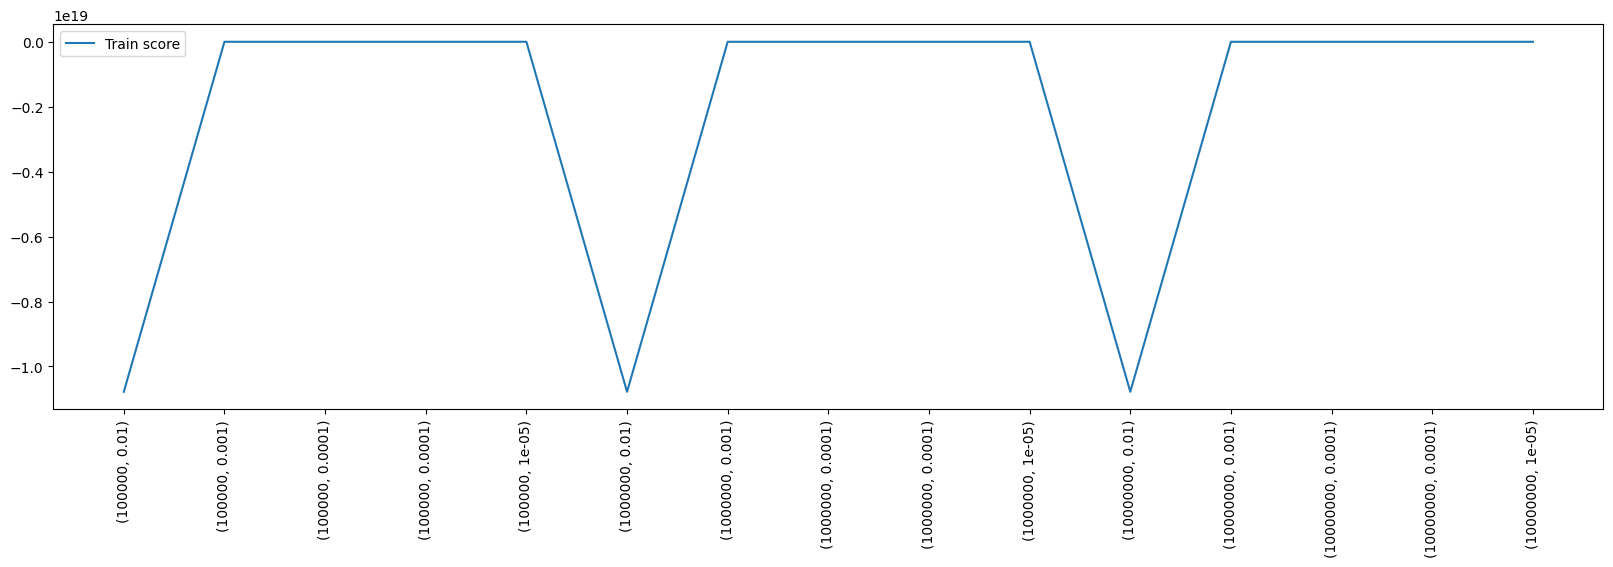

In [122]:
%matplotlib inline

# plotting the train scores for diff parameter tuning
plt.subplots(figsize = (20,5))
plt.plot(range(len(index)),  train_score, label = 'Train score')
plt.xticks(range(len(index)), index, rotation = 90)
plt.legend()
plt.show()

In [123]:
sgd = SGDRegressor(random_state = 0, max_iter = 100000, learning_rate = 'constant', eta0 = 0.00001)
sgd.fit(X, Y)

ypred = sgd.predict(X)

mse = mean_squared_error(Y,ypred)

#Metrics
print("Mean Square Error: " , mse)
print("Root Mean Square Error: ", mse**(1/2.0))
print('Mean Absolute Error is:', mean_absolute_error(Y,ypred))
sgd_score = sgd.score(X, Y)
print('train r2-score: ', sgd_score)

Mean Square Error:  9153.881735363311
Root Mean Square Error:  95.67592035284171
Mean Absolute Error is: 36.2330788464407
train r2-score:  0.020083994788193005


In [124]:
sgd.n_iter_

73

In [125]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x_poly, y_poly = X_scaled_dfr, Y

# Processing by transforming the data to polynomial form using degree as 2
poly = PolynomialFeatures(degree=2)
poly.fit(x_poly)
X_train_poly = poly.transform(x_poly)

# Performing Linear Regression analysis
lreg = LinearRegression()
lreg.fit(X_train_poly, y_poly)

# Calculating and printing the R-squared score
poly_score = lreg.score(X_train_poly, y_poly)
print('train r2-score:', poly_score)

train r2-score: 0.05978966908826744


In [126]:
train_score = []
validation_score = []
index = []

# Tuning the params for polynomial regression to select the best params which gives high train score.
for max_iter in [10000, 100000, 1000000]:
    for eta0 in [0.01, 0.001, 0.0001, 0.0001]:
        sgd = SGDRegressor(random_state = 0, max_iter = max_iter, learning_rate = 'constant', eta0 = eta0)
        sgd.fit(X_train_poly, y_poly)
        train_score.append(sgd.score(X_train_poly, y_poly))
        # validation_score.append(sgd.score(X_valid_poly, y_valid))
        index.append((max_iter, eta0))

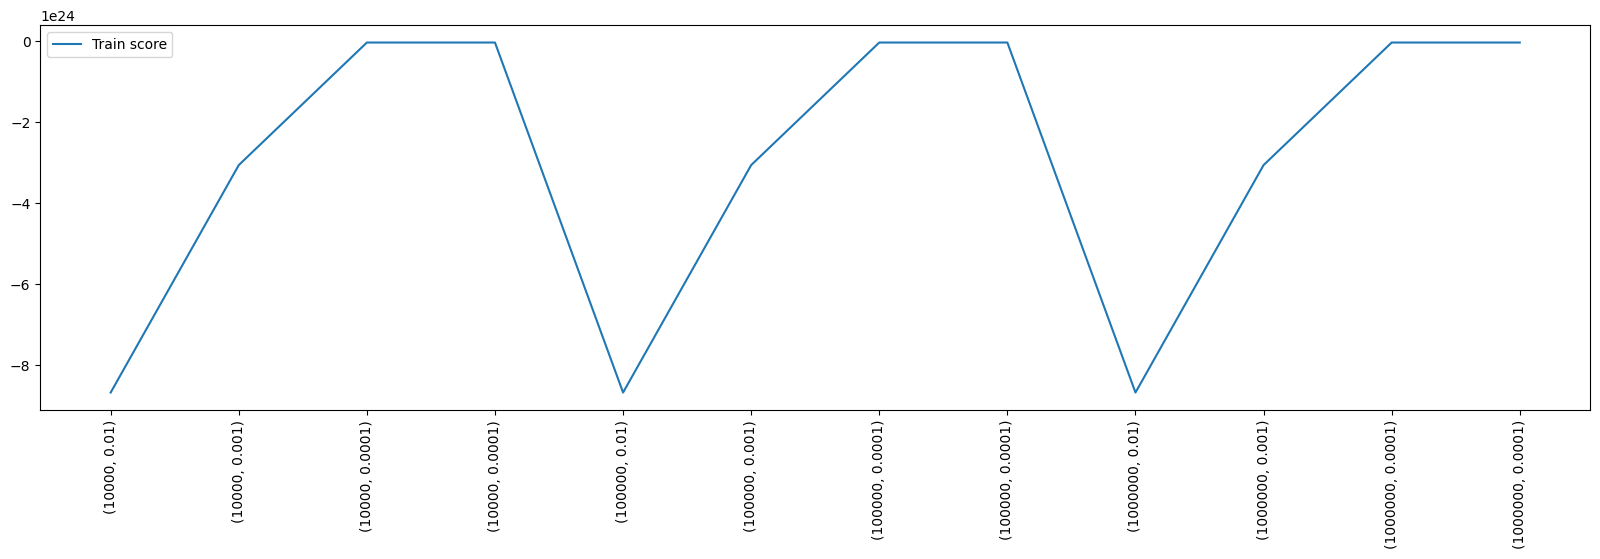

In [127]:
%matplotlib inline

# plotting the train scores for diff parameter tuning
plt.subplots(figsize = (20,5))
plt.plot(range(len(index)),  train_score, label = 'Train score')
plt.xticks(range(len(index)), index, rotation = 90)
plt.legend()
plt.show()

In [128]:
sgd = SGDRegressor(random_state = 0, max_iter = 10000, learning_rate = 'constant', eta0 = 0.0001)
sgd.fit(X_train_poly, y_poly)

poly_score = sgd.score(X_train_poly, y_poly)
print('train r2-score: ', poly_score)

train r2-score:  -3.9855898429381165e+22


Text(0, 0.5, 'Y')

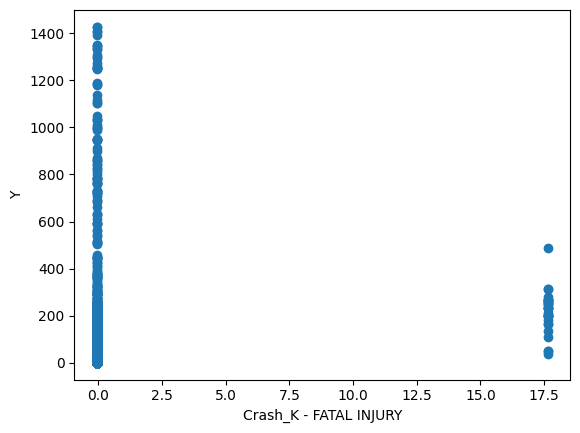

In [129]:
#Decision Tree 
X_tree = X_scaled_dfr
y_tree = Y
%matplotlib inline

plt.scatter(X_scaled_dfr['Crash_K - FATAL INJURY'], y_tree)
plt.xlabel('Crash_K - FATAL INJURY')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

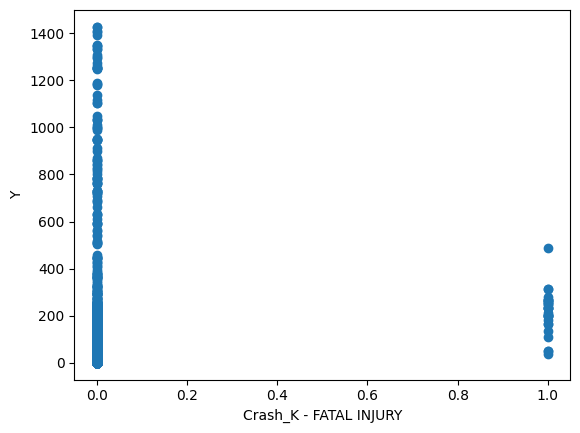

In [130]:
X_tree = X_dfr
y_tree = Y
%matplotlib inline

plt.scatter(X_dfr['Crash_K - FATAL INJURY'], y_tree)
plt.xlabel('Crash_K - FATAL INJURY')
plt.ylabel('Y')

In [131]:
from sklearn.tree import DecisionTreeRegressor

# processing Decision Tree regression
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_tree['Crash_K - FATAL INJURY'].values.reshape(-1,1), y_tree.values)

DecisionTreeRegressor(random_state=0)

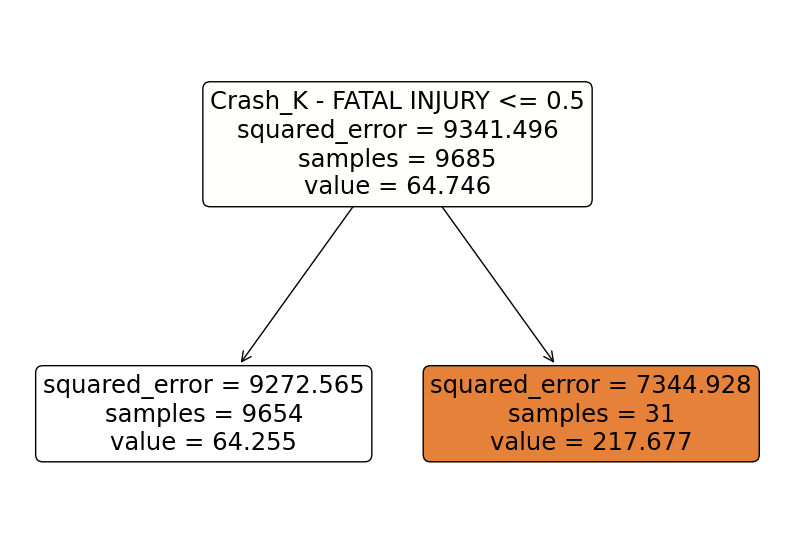

In [132]:
from sklearn import tree 

# plotting decision tree for our model data
plt.subplots(figsize = (10,7))
tree.plot_tree(dt, 
               feature_names=['Crash_K - FATAL INJURY'],  
               filled=True,
               rounded = True)
plt.show()

In [133]:
dfr.columns

Index(['Crash ID', 'Speed Limit', 'Surface Width', 'y',
       'Crash_A - SUSPECTED SERIOUS INJURY',
       'Crash_B - SUSPECTED MINOR INJURY', 'Crash_C - POSSIBLE INJURY',
       'Crash_K - FATAL INJURY', 'Crash_N - NOT INJURED', 'Weather_1 - CLEAR',
       'Weather_2 - CLOUDY', 'Weather_3 - RAIN', 'Weather_6 - FOG',
       'Day of week_FRIDAY', 'Day of week_MONDAY', 'Day of week_SATURDAY',
       'Day of week_SUNDAY', 'Day of week_THURSDAY', 'Day of week_TUESDAY',
       'Day of week_WEDNESDAY', 'Vehicle_AM - AMBULANCE', 'Vehicle_BU - BUS',
       'Vehicle_EV - NEV-NEIGHBORHOOD ELECTRIC VEHICLE',
       'Vehicle_FT - FIRE TRUCK', 'Vehicle_MC - MOTORCYCLE',
       'Vehicle_P2 - PASSENGER CAR, 2-DOOR',
       'Vehicle_P4 - PASSENGER CAR, 4-DOOR', 'Vehicle_PC - POLICE CAR/TRUCK',
       'Vehicle_PK - PICKUP', 'Vehicle_SB - YELLOW SCHOOL BUS',
       'Vehicle_SV - SPORT UTILITY VEHICLE',
       'Vehicle_TL - TRAILER, SEMI-TRAILER, OR POLE TRAILER',
       'Vehicle_TR - TRUCK', 'Vehicle_T

In [134]:
vals = [0.5, 1.5, 2.5, 3.5]

# getting mean and rss (residual sum of squares) for analyzing the split of data in left split and right split
rss1 = []
rss2 = []
for val in vals:
    mean = dfr[dfr['Crash_K - FATAL INJURY'] < val]['y'].mean()
    rss = ((dfr[dfr['Crash_K - FATAL INJURY'] < val]['y'].mean() - mean)** 2).sum()
    rss1.append(rss)
    mean = dfr[dfr['Crash_K - FATAL INJURY'] >= val]['y'].mean()
    rss = ((dfr[dfr['Crash_K - FATAL INJURY'] >= val]['y']- mean)** 2).sum()
    rss2.append(rss)

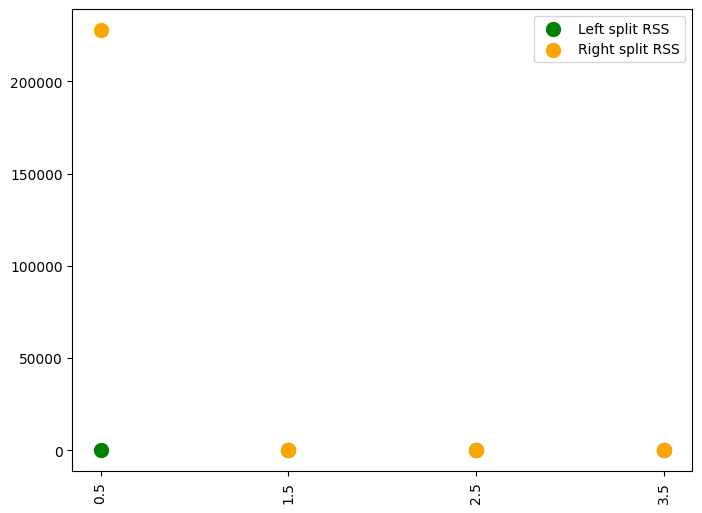

In [135]:
%matplotlib inline

# plotting the scatter plot for above rss scores, to know the left and right split
plt.subplots(figsize = (8, 6))
plt.scatter(vals, rss1, label = 'Left split RSS', s= 100, c = 'g')
plt.scatter(vals, rss2, label = 'Right split RSS', s = 100, c = 'orange')
plt.legend()
plt.xticks(vals, rotation = 90)
plt.show()

In [136]:
rss1 = np.array(rss1)
rss2 = np.array(rss2)

cost = []
index = 0
for val in vals:
    left = X_scaled_dfr[X_scaled_dfr['Crash_K - FATAL INJURY'] < val].shape[0]/new_reg_train_data.shape[0]
    right = X_scaled_dfr[X_scaled_dfr['Crash_K - FATAL INJURY'] >= val].shape[0]/new_reg_train_data.shape[0]
    cost.append(left*rss1[index] + right*rss2[index])
    index += 1

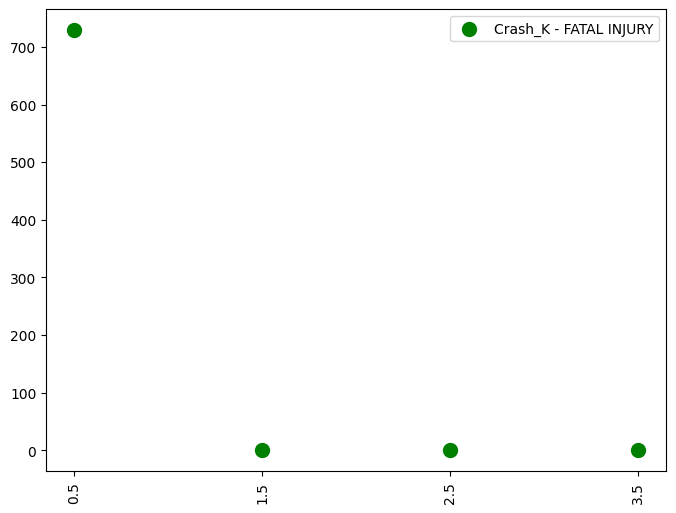

In [137]:
%matplotlib inline

plt.subplots(figsize = (8, 6))
plt.scatter(vals, cost, label = 'Crash_K - FATAL INJURY', s= 100, c = 'g')
plt.legend()
plt.xticks(vals, rotation = 90)
plt.show()

In [138]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

# scaling our data using standard scaling
scaler = StandardScaler()
scaler.fit(X_tree)
X_train = scaler.transform(X_tree)
dtreg = DecisionTreeRegressor(random_state= 0)
dtreg.fit(X_tree, y_tree)
dtreg_score = dtreg.score(X_tree, y_tree)
print('Train r2-score:', dtreg_score  )

Train r2-score: 0.9998758184701965


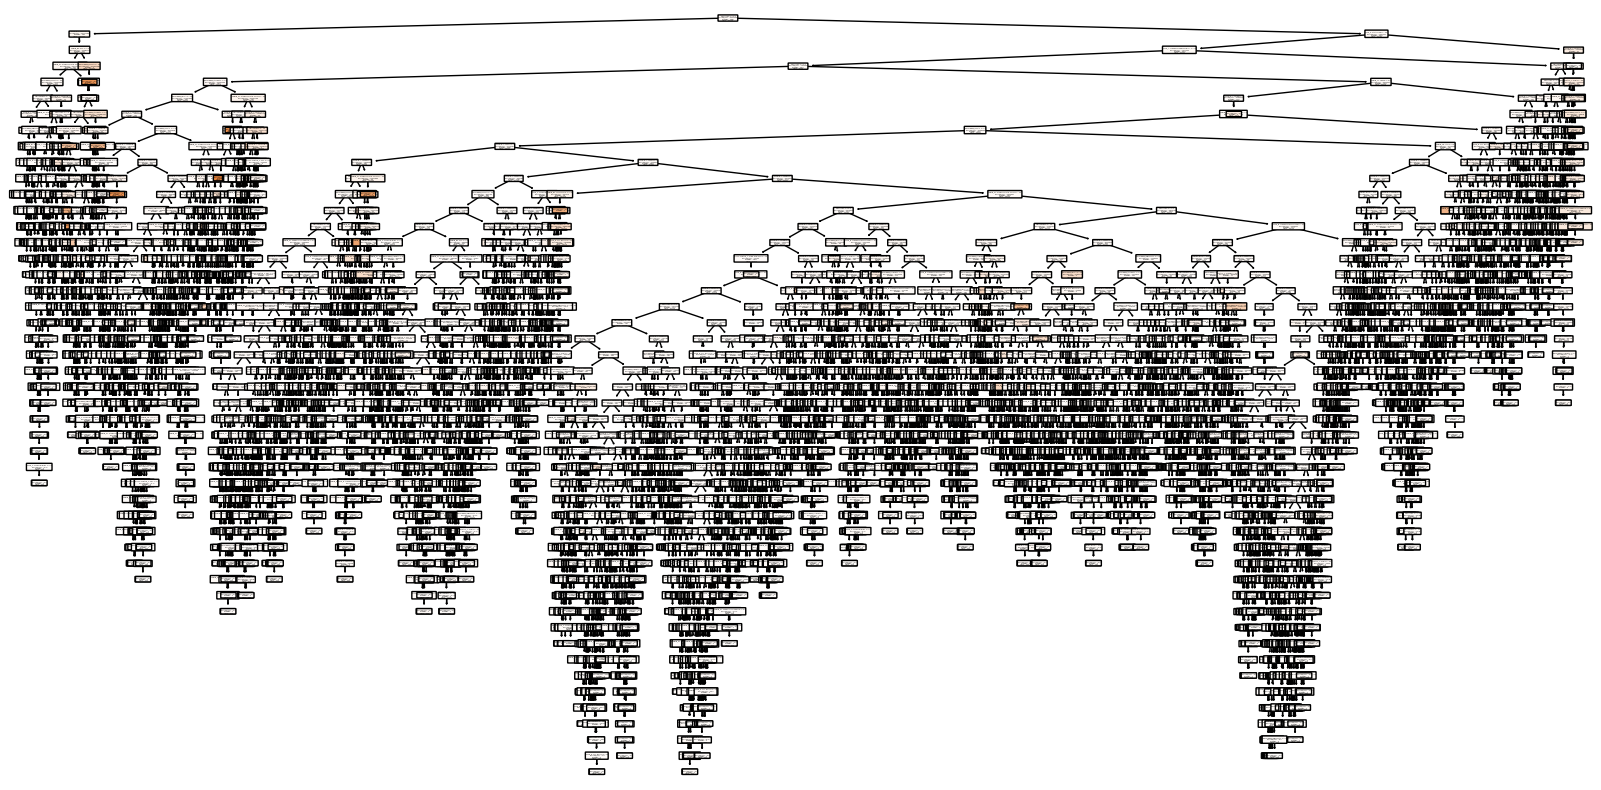

In [139]:
# plotting the decision tree, for our above model

plt.subplots(figsize = (20, 10))
plot_tree(dtreg, 
               feature_names=X_tree.columns,  
              
               filled=True,
               rounded = True)
plt.show()

In [140]:
train_scores = []
index = []

# Tuning the params to get best params, for getting better train score.
# min_samples_split, max_depth, min_impurity_decrease
for smpl_split in list(range(20, 40)):
    for  max_dpth in list(range(2,10)):
        for min_imp_dec in [0.01, 0.001, 0.0001]:
            dt = DecisionTreeRegressor(random_state = 0, min_samples_split= smpl_split, max_depth = max_dpth, min_impurity_decrease= min_imp_dec)
            dt.fit(X_train, y_tree)
            train_scores.append(dt.score(X_train, y_tree))
            index.append([smpl_split, max_dpth, min_imp_dec])

In [141]:
# getting highest train score value and index of it.
train_scores[np.argsort(train_scores)[-1]], index[np.argsort(train_scores)[-1]]

(0.17745922755358734, [20, 9, 0.01])

In [142]:
# processing with above params for our decision tree model.
dt = DecisionTreeRegressor(random_state = 0, min_samples_split = 20, max_depth = 9, min_impurity_decrease = 0.0001)
dt.fit(X_train, y_tree)
dt_score = dt.score(X_train, y_tree)
print("Accuracy on training set: {:.3f}".format(dt_score))

Accuracy on training set: 0.177


In [143]:
#Bagging Regression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

X = new_reg_train_data.drop('y', axis = 1)
y = new_reg_train_data['y']
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# processing the bagging regressor with below params. 
dt_model = DecisionTreeRegressor(random_state = 0)
bag_reg_model = BaggingRegressor(dt_model, 
                                max_features=1.0, 
                                n_estimators=5, 
                                bootstrap=True, 
                                random_state=0)
bag_reg_model.fit(X_scaled, y)

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=0),
                 n_estimators=5, random_state=0)

In [144]:
bag_reg_score = bag_reg_model.score(X_scaled, y)
print('Train score: ', bag_reg_score)

Train score:  0.7499888738692215


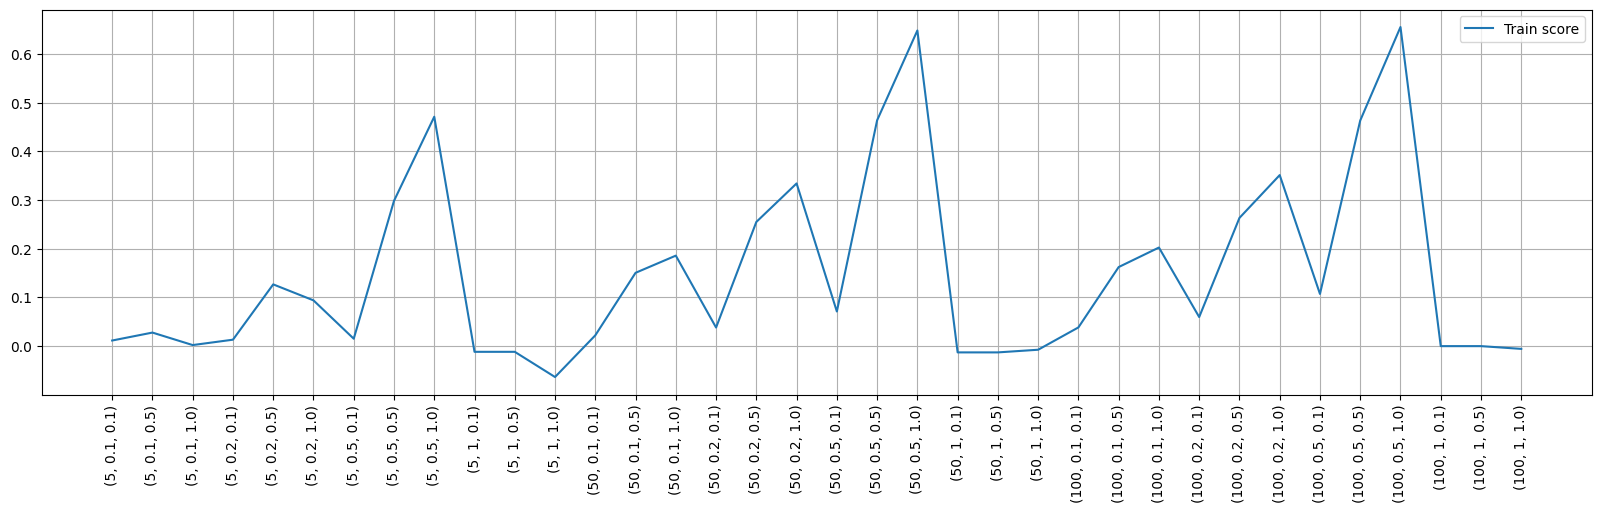

In [145]:
train_score = []
test_score = []
index = []

# Tuning the params with bagging regressor and decision tree model for better train score
for n_estimators in [5, 50, 100]:    
    for max_samples in [0.1, 0.2, 0.5, 1]:
        for max_features in [0.1, 0.5, 1.0]:
            dt_model = DecisionTreeRegressor(random_state = 0)
            bag_dt_model = BaggingRegressor(dt_model, 
                                max_features = max_features, 
                                n_estimators = n_estimators, 
                                max_samples = max_samples,
                                bootstrap = True, 
                                random_state=0)
            bag_dt_model.fit(X_scaled, y)
            train_score.append(bag_dt_model.score(X_scaled, y))
            index.append((n_estimators,
                          max_samples, max_features))

%matplotlib inline

# plotting the train score for above tuning params
plt.subplots(figsize = (20,5))
plt.plot(range(len(index)), train_score, label = 'Train score')
plt.xticks(range(len(index)), index, rotation = 90)
plt.legend()
plt.grid()

In [146]:
# getting highest train score value and index of it.
train_score[np.argsort(train_score)[-1]], index[np.argsort(train_score)[-1]]

(0.655131668747893, (100, 0.5, 1.0))

In [147]:
# processing and performing or training our model with above tuning params
dt_model = DecisionTreeRegressor(random_state = 0)
bag_dt_model = BaggingRegressor(dt_model, 
                                max_samples=0.5,
                                max_features=1.0, 
                                n_estimators=100, 
                                bootstrap=True, 
                                random_state=0)
bag_dt_model.fit(X_scaled, y)
bagg_dt_score = bag_dt_model.score(X_scaled, y)
print('Train score: ', bagg_dt_score)

Train score:  0.655131668747893


In [148]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# processing random forest with max depth 1 
rfr = RandomForestRegressor(max_depth = 1, random_state=0)
rfr.fit(X_scaled, y)

print('Train score: ', rfr.score(X_scaled, y))

Train score:  0.0138917943203829


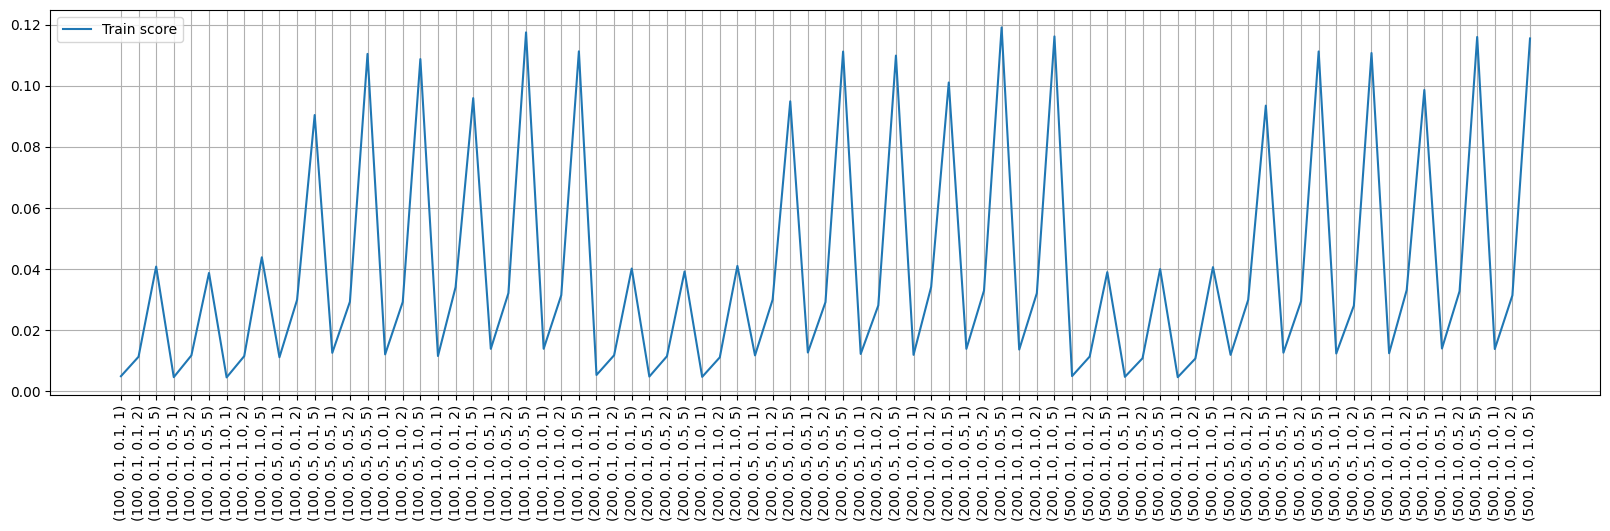

In [149]:
train = []
test = []
index = []

# Tuning the params for our model for get better accuracy
for n_estimators in [100, 200, 500]:
    for max_features in [0.1, 0.5, 1.0]:
        for max_samples in [0.1, 0.5, 1.0]:
            for max_depth in [1, 2, 5]:
                rfr = RandomForestRegressor(random_state= 0, 
                                             n_estimators = n_estimators,
                                             max_samples= max_samples, 
                                             max_features= max_features, 
                                             max_depth= max_depth)
                rfr.fit(X_scaled, y)
                train.append(rfr.score(X_scaled, y))
                index.append((n_estimators, max_features, 
                              max_samples, max_depth))
                
%matplotlib inline

# plotting the train scores for various tuning params
plt.subplots(figsize = (20,5))
plt.plot(range(len(index)), train, label = 'Train score')
plt.xticks(range(len(index)), index, rotation = 90)
plt.legend()
plt.grid()

In [150]:
# getting highest train score value and index of it.
train[np.argsort(train)[-1]], index[np.argsort(train)[-1]]

(0.11911720479108523, (200, 1.0, 0.5, 5))

In [ ]:
# Training our random forest regressor model with above tuning params
rfr = RandomForestRegressor(random_state= 0, n_estimators = 500, max_samples= 1.0, 
                            max_features= 1.0, max_depth= 5)
rfr.fit(X_scaled, y)

rf_score = rfr.score(X_scaled, y)
print('Train score: ', rf_score)

In [ ]:
model_scores = [stat_sl_score*100,
                mlr_score*100,
                sgd_score*100,
                poly_score*100,
                dt_score*100,
                bag_reg_score*100,
                bagg_dt_score*100,
                rf_score*100]

model_names = ["simple linear reg",
               "multiple linear regression",  
               "SGD reg", "polynomial reg", 
               "Decision Tree reg", "Bagging reg", "Bagging reg with decision tree reg", "Random Forest"]

for name, score in zip(model_names, model_scores):
    print(f"{name}: {score}")

### Regression prediction

In [ ]:
#Bagging Regression Model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

X_test = X_scaled_dfr2

# Predicting the test data
yt_pred = bag_reg_model.predict(X_test)

# Updating the DataFrame with predicted values for the test data
new_reg_test_data["y"] = yt_pred

# Predicting on the training data
ytr_pred = bag_reg_model.predict(X_scaled)

# Calculating and printing Mean Absolute Error on the training data
mae_train = mean_absolute_error(y, ytr_pred)
print('Mean Absolute Error on Training Data:', mae_train)

accuracy_score = bag_reg_model.score(X_scaled,y)*100
print('accuracy score:', accuracy_score) 

In [ ]:
ytr_pred

In [ ]:
r2_score(y, ytr_pred)*100

In [ ]:
mean_squared_error(y, ytr_pred)

In [ ]:
np.sqrt(mean_squared_error(y, ytr_pred))

In [ ]:
new_reg_test_data["y"].value_counts()

In [ ]:
print(f'Based on the different classification models tried on the training data, we modelled the test data using Bagging Regression Model.\n')

print(f"The predicted time to clear a crash scene is most commonly between 40.4 and 51.4 minutes.")

# Classification

### Data preparation

In [ ]:
#importing all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pylab import rcParams
import seaborn as sb
import sklearn 
import sklearn.metrics

import warnings
# Ignore the "deprecated" warning category
warnings.filterwarnings("ignore")

In [ ]:
#read dataset into jupyter 
class_train = pd.read_csv("Classification_train.csv")

#create a dataframe out of the dataset 
dfc = pd.DataFrame(class_train)
dfc.head()

In [ ]:
class_test = pd.read_csv("Classification_test.csv")
#create a dataframe out of the dataset 
dfc2 = pd.DataFrame(class_test)
dfc2.head()

In [ ]:
dfc.columns

In [ ]:
dfc2.columns

In [ ]:
dfc.isna().sum()

In [ ]:
dfc2.isna().sum()

In [ ]:
dfc['Gender'].value_counts()

In [ ]:
dfc2['Gender'].value_counts()

In [ ]:
most_frequent_gen = dfc['Gender'].mode()[0]
dfc['Gender'].fillna(most_frequent_gen, inplace=True)
dfc['Gender'] = dfc['Gender'].map({'Female': 1, 'Male': 0})

In [ ]:
most_frequent_gen2 = dfc2['Gender'].mode()[0]
dfc2['Gender'].fillna(most_frequent_gen2, inplace=True)
dfc2['Gender'] = dfc2['Gender'].map({'Female': 1, 'Male': 0})
dfc2.head()

In [ ]:
dfc['Age'].value_counts()

In [ ]:
dfc2['Age'].value_counts()

In [ ]:
dfc['Age'].describe()

In [ ]:
dfc2['Age'].describe()

In [ ]:
dfc['Height'].value_counts()

In [ ]:
dfc2['Height'].value_counts()

In [ ]:
dfc['Height'].describe()

In [ ]:
dfc2['Height'].describe()

In [ ]:
dfc2['Height'].plot(kind = 'kde')

In [ ]:
dfc2['Height'].fillna(dfc2['Height'].median(), inplace=True)
dfc2['Height'].isna().sum()

In [ ]:
dfc['Weight'].value_counts()

In [ ]:
dfc2['Weight'].value_counts()

In [ ]:
dfc['Weight'].plot(kind = 'kde')

In [ ]:
dfc2['Weight'].plot(kind = 'kde')

In [ ]:
dfc['Weight'].fillna(dfc['Weight'].median(), inplace=True)
dfc['Weight'].isna().sum()

In [ ]:
dfc2['Weight'].fillna(dfc2['Weight'].median(), inplace=True)
dfc2['Weight'].isna().sum()

In [ ]:
dfc['family_history_with_overweight'].value_counts()

In [ ]:
dfc2['family_history_with_overweight'].value_counts()

In [ ]:
most_frequent_fam = dfc['family_history_with_overweight'].mode()[0]
dfc['family_history_with_overweight'].fillna(most_frequent_fam, inplace=True)
dfc['family_history_with_overweight'] = dfc['family_history_with_overweight'].map({'yes': 1, 'no': 0})
dfc.head()

In [ ]:
most_frequent_fam2 = dfc2['family_history_with_overweight'].mode()[0]
dfc2['family_history_with_overweight'].fillna(most_frequent_fam2, inplace=True)
dfc2['family_history_with_overweight'] = dfc2['family_history_with_overweight'].map({'yes': 1, 'no': 0})
dfc2.head()

In [ ]:
dfc['FAVC'].value_counts()
dfc['FAVC'].fillna('yes', inplace=True)
dfc['FAVC'].isna().sum()

In [ ]:
dfc['FAVC'].value_counts()
favc_mapping = {'yes': 1, 'no': 0}
dfc['FAVC'] = dfc['FAVC'].map(favc_mapping)

In [ ]:
dfc2['FAVC'].value_counts()
favc_mapping = {'yes': 1, 'no': 0}
dfc2['FAVC'] = dfc2['FAVC'].map(favc_mapping)

In [ ]:
dfc['FCVC'].value_counts()

In [ ]:
dfc['FCVC'].plot(kind = 'kde')

In [ ]:
dfc['FCVC'] = dfc['FCVC'].fillna(dfc['FCVC'].median())

In [ ]:
dfc['FCVC'].isna().sum()

In [ ]:
dfc['NCP'].value_counts()

In [ ]:
dfc2['NCP'].value_counts()

In [ ]:
dfc['NCP'].plot(kind = 'kde')

In [ ]:
dfc2['NCP'].plot(kind = 'kde')

In [ ]:
dfc['NCP'].fillna(dfc['NCP'].median(), inplace=True)
dfc['NCP'].isna().sum()

In [ ]:
dfc2['NCP'].fillna(dfc2['NCP'].median(), inplace=True)
dfc2['NCP'].isna().sum()

In [ ]:
dfc['CAEC'].value_counts()

In [ ]:
dfc2['CAEC'].value_counts()

In [ ]:
dfc['SMOKE'].value_counts()

In [ ]:
dfc2['SMOKE'].value_counts()

In [ ]:
dfc['SMOKE'].fillna('no', inplace=True)
dfc['SMOKE'].isna().sum()
SMOKE_mapping = {'no': 1, 'yes': 0}
dfc['SMOKE'] = dfc['SMOKE'].map(SMOKE_mapping)

In [ ]:
dfc2['SMOKE'].fillna('no', inplace=True)
dfc2['SMOKE'].isna().sum()
SMOKE_mapping = {'no': 1, 'yes': 0}
dfc2['SMOKE'] = dfc2['SMOKE'].map(SMOKE_mapping)

In [ ]:
dfc['CH2O'].value_counts()

In [ ]:
dfc2['CH2O'].value_counts()

In [ ]:
dfc['SCC'].value_counts()

In [ ]:
dfc2['SCC'].value_counts()

In [ ]:
dfc['SCC'].fillna('no', inplace=True)
dfc['SCC'].isna().sum()
SCC_mapping = {'no': 1, 'yes': 0}
dfc['SCC'] = dfc['SCC'].map(SCC_mapping)

In [ ]:
dfc2['SCC'].fillna('no', inplace=True)
dfc2['SCC'].isna().sum()
SCC_mapping = {'no': 1, 'yes': 0}
dfc2['SCC'] = dfc2['SCC'].map(SCC_mapping)

In [ ]:
dfc['FAF'].value_counts()

In [ ]:
dfc2['FAF'].value_counts()

In [ ]:
dfc2['FAF'].plot(kind = 'kde')

In [ ]:
dfc2['FAF'].fillna(dfc2['FAF'].median(), inplace=True)
dfc2['FAF'].isna().sum()

In [ ]:
dfc['TUE'].value_counts()

In [ ]:
dfc2['TUE'].value_counts()

In [ ]:
dfc['TUE'].plot(kind = 'kde')

In [ ]:
dfc2['TUE'].plot(kind = 'kde')

In [ ]:
dfc['TUE'].fillna(dfc['TUE'].median(), inplace=True)
dfc['TUE'].isna().sum()

In [ ]:
dfc2['TUE'].fillna(dfc2['TUE'].median(), inplace=True)
dfc2['TUE'].isna().sum()

In [ ]:
dfc['CALC'].value_counts()

In [ ]:
dfc2['CALC'].value_counts()

In [ ]:
dfc['CALC'].fillna('Sometimes', inplace=True)
dfc['CALC'].isna().sum()

In [ ]:
dfc2['CALC'].fillna('Sometimes', inplace=True)
dfc2['CALC'].isna().sum()

In [ ]:
dfc['MTRANS'].value_counts()

In [ ]:
dfc2['MTRANS'].value_counts()

In [ ]:
dfc['MTRANS'].fillna('Public_Transportation', inplace=True)
dfc['MTRANS'].isna().sum()

In [ ]:
dfc2['MTRANS'].fillna('Public_Transportation', inplace=True)
dfc2['MTRANS'].isna().sum()

In [ ]:
dfc['y'].value_counts()

In [ ]:
dfc.info()

In [ ]:
import pandas as pd

# Display value counts before encoding
print(dfc["CAEC"].value_counts())

# Perform one-hot encoding
dfc = pd.get_dummies(dfc, columns=['CAEC'], prefix='CAEC')

# Display the DataFrame after encoding
print(dfc.head())

In [ ]:
dfc2 = pd.get_dummies(dfc2, columns=['CAEC'], prefix='CAEC')
print(dfc2.head())

In [ ]:
dfc = pd.get_dummies(dfc, columns=['CALC'], prefix='CALC')
dfc2 = pd.get_dummies(dfc2, columns=['CALC'], prefix='CALC')
print(dfc.head())
print(dfc2.head())

In [ ]:
dfc = dfc.drop(['CALC_Always'], axis = 1)

In [ ]:
dfc = pd.get_dummies(dfc, columns=['MTRANS'], prefix='MTRANS')
dfc2 = pd.get_dummies(dfc2, columns=['MTRANS'], prefix='MTRANS')
print(dfc.head())
print(dfc2.head())

In [ ]:
dfc = dfc.drop(['MTRANS_Bike'], axis = 1)

In [ ]:
dfc.info()

In [ ]:
dfc2.info()

In [ ]:
dfc['y'].value_counts()

In [ ]:
#Clustering for training data
X = dfc.drop(['y'], axis = 1)
y = dfc['y']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import  silhouette_score

silhouette_scores = []
for n_clusters in range(2, 30):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

# Plot the silhouette scores for different number of clusters
import matplotlib.pyplot as plt
plt.plot(range(2, 30), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()
print(silhouette_scores)

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Initialize AgglomerativeClustering with a large number of clusters
agg_clustering = AgglomerativeClustering()
# Fit the model on your data
agg_clustering.fit(X_scaled)
plt.subplots(figsize = (10,10))
dendrogram(linkage(X_scaled, method = 'ward'))
plt.axhline(y = 1.5, c = 'r', linestyle = '--')
plt.show()

In [ ]:
# Perform Agglomerative Clustering with 20 clusters
agg_clustering = AgglomerativeClustering(n_clusters=20)
clusters = agg_clustering.fit_predict(X_scaled)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=20)
kmeans.fit(X_scaled)

# Get the cluster labels and centers
clusters = kmeans.predict(X_scaled)
centers = kmeans.cluster_centers_


In [ ]:
### Classification model training

In [ ]:
#Logistic Regression for training data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Create a logistic regression object
log_reg2 = LogisticRegression()

# Fit the model to the training data
log_reg2.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg2.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

In [ ]:
#Decision Tree Classifier for Training data
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a decision tree classifier object
dtc2 = DecisionTreeClassifier()

# Fit the model to the training data
dtc2.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dtc2.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
#Random Forest Classifier  for Training data
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a random forest classifier object
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
#Dimension Reduction  for Training data
from sklearn.decomposition import PCA

# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Fit the PCA model to the scaled data
X_pca = pca.fit_transform(X_scaled)

# Split the transformed data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)

# Create a logistic regression object
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to the data with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the transformed data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)

# Create a decision tree classifier object
dtc = DecisionTreeClassifier()

# Fit the model to the training data
dtc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dtc.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
#Based on the accuracy scores achieved in all the above classification models,
#Random Forest classifier serves as the best model as it has the highest accuracy score. 

In [ ]:
### Classification prediction <br>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create a decision tree classifier object
dtc = DecisionTreeClassifier()

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(dtc, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the test data using the best model
best_dtc = grid_search.best_estimator_
y_pred = best_dtc.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create a decision tree classifier object
rfc = RandomForestClassifier()

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(dtc, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the test data using the best model
best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
# Scalng of test data

In [ ]:
dfc2.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
new_X_scaled = scaler.fit_transform(dfc2)
new_X_scaled = scaler.transform(dfc2)
X_scaled1 = pd.DataFrame(new_X_scaled, columns=dfc2.columns)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Set a seed for reproducibility
np.random.seed(7)

# Create an instance of RandomForestClassifier
rfc = RandomForestClassifier()

# Fit the model on the training data
rfc.fit(X_train, y_train)

# Now you can use the predict method to predict the weight category for the test data
new_y_pred_test = rfc.predict(X_scaled1)

# Assign the predicted values to the 'Weight category' column in your test dataset DataFrame
dfc2['Weight category'] = new_y_pred_test

In [ ]:
dfc2['Weight category'].value_counts()

In [ ]:
print('Based on the different classification models tried on the training data, we modelled the test data using Random Forest Classifier.\n')

print('The predicted weight category in the test data are: Normal_Weight = 242 and Insufficient_Weight = 75')